In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score

In [55]:
df= pd.read_csv('/content/Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [56]:
df.shape

(545, 13)

In [57]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [58]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [60]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [61]:
df.duplicated().sum()

0

In [62]:
for column in df.columns:
    unique_values = df[column].unique()
    if unique_values.size > 0:
        print(column, "has", unique_values.size, "unique values", unique_values)
    else:
        print(column, "doesn't have any unique values")

price has 219 unique values [13300000 12250000 12215000 11410000 10850000 10150000  9870000  9800000
  9681000  9310000  9240000  9100000  8960000  8890000  8855000  8750000
  8680000  8645000  8575000  8540000  8463000  8400000  8295000  8190000
  8120000  8080940  8043000  7980000  7962500  7910000  7875000  7840000
  7700000  7560000  7525000  7490000  7455000  7420000  7350000  7343000
  7245000  7210000  7140000  7070000  7035000  7000000  6930000  6895000
  6860000  6790000  6755000  6720000  6685000  6650000  6629000  6615000
  6580000  6510000  6475000  6440000  6419000  6405000  6300000  6293000
  6265000  6230000  6195000  6160000  6125000  6107500  6090000  6083000
  6020000  5950000  5943000  5880000  5873000  5866000  5810000  5803000
  5775000  5740000  5652500  5600000  5565000  5530000  5523000  5495000
  5460000  5425000  5390000  5383000  5320000  5285000  5250000  5243000
  5229000  5215000  5145000  5110000  5075000  5040000  5033000  5005000
  4970000  4956000  493

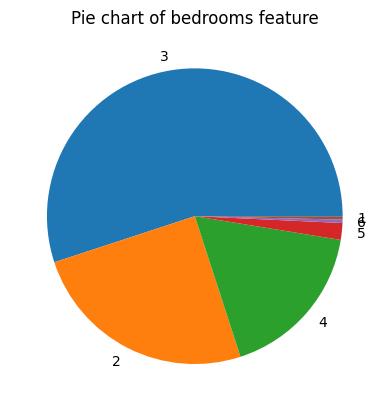

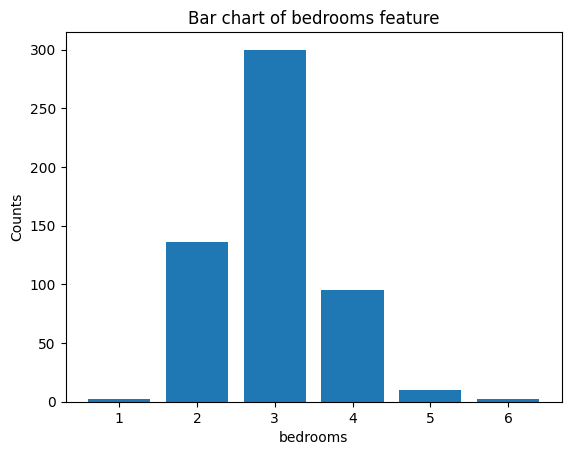

************************************************************


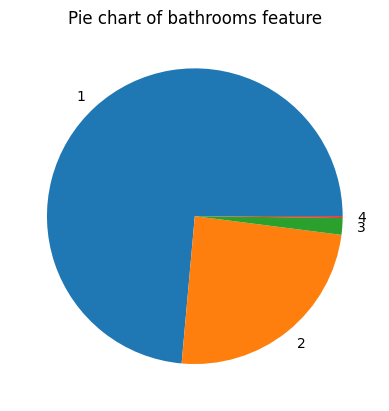

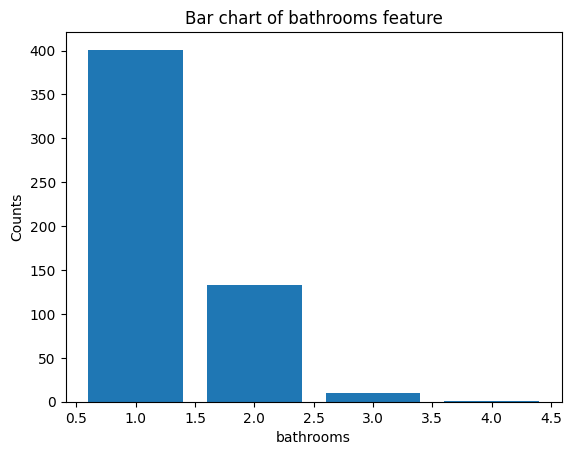

************************************************************


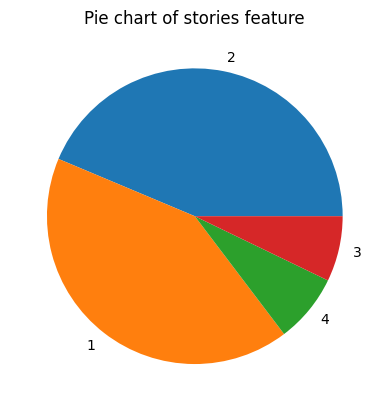

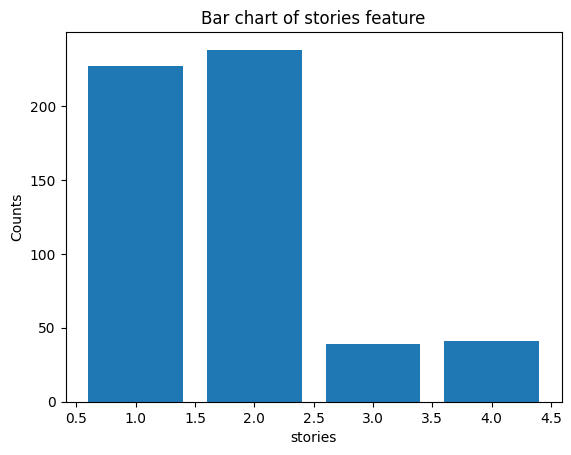

************************************************************


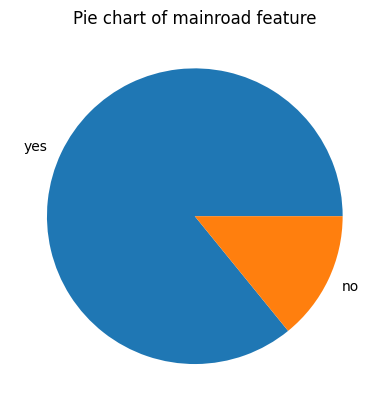

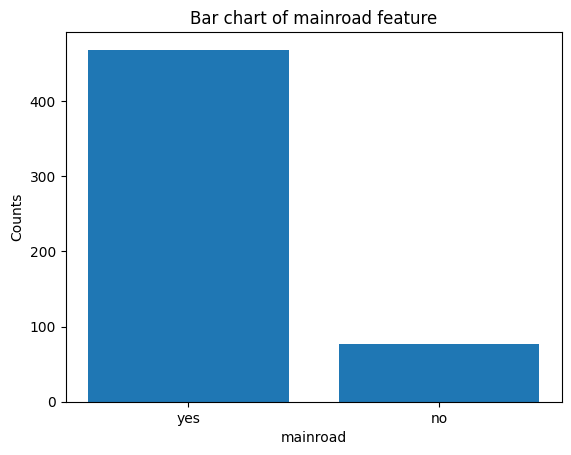

************************************************************


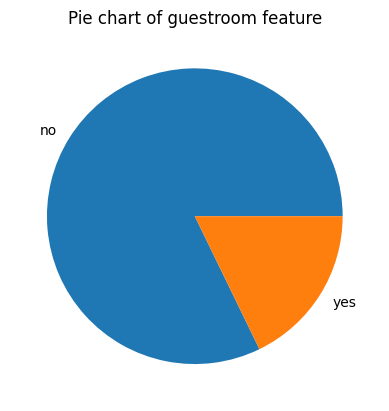

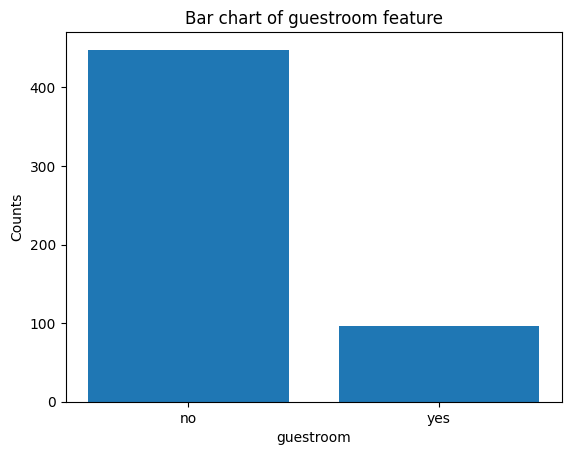

************************************************************


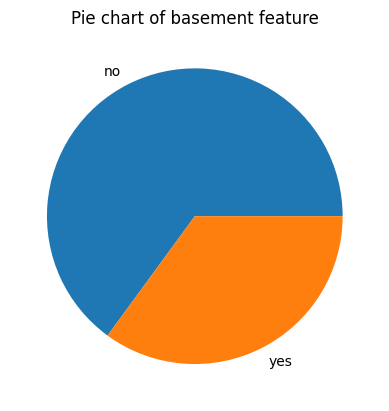

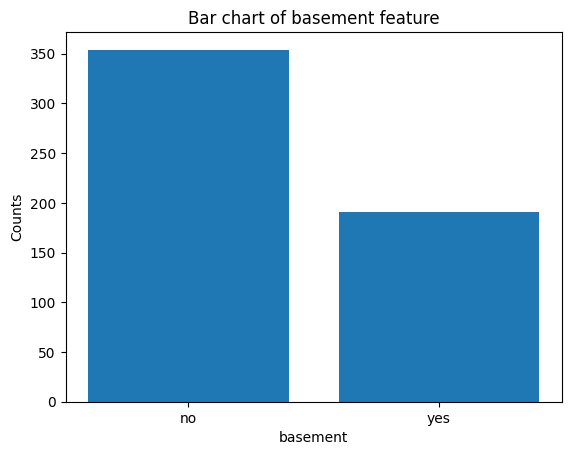

************************************************************


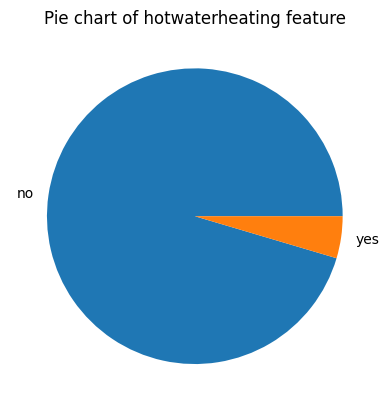

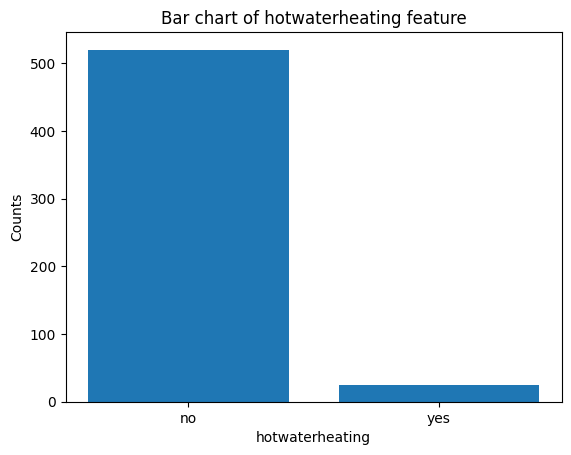

************************************************************


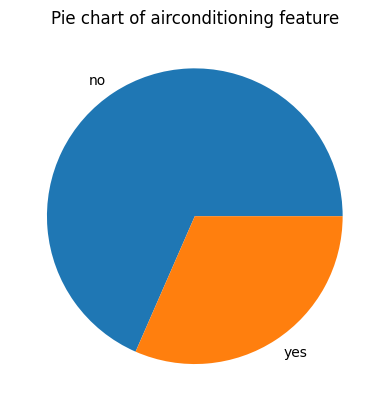

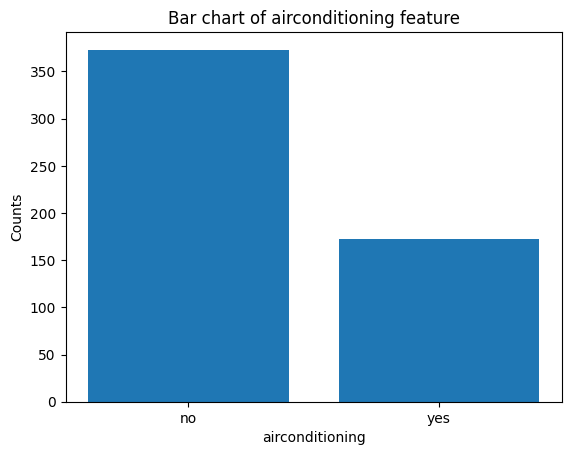

************************************************************


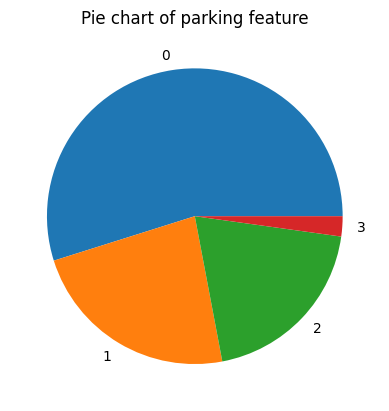

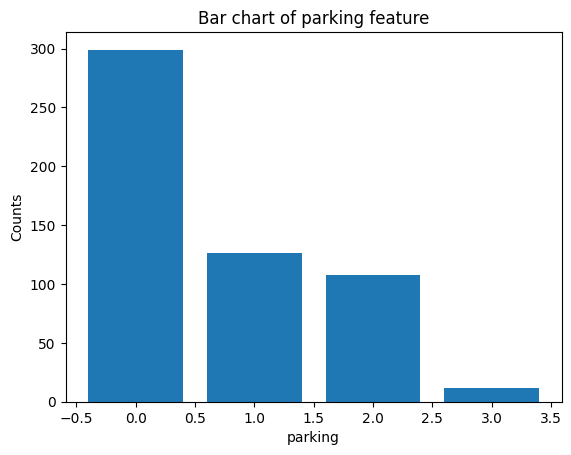

************************************************************


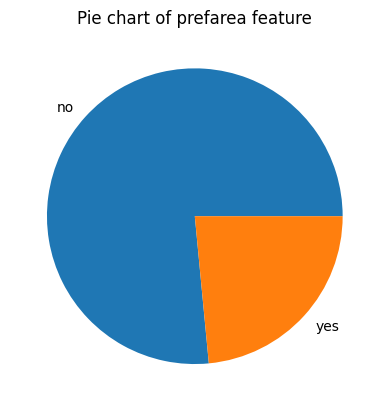

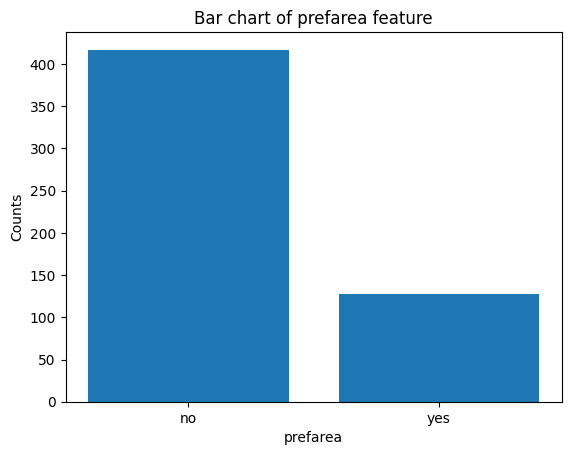

************************************************************


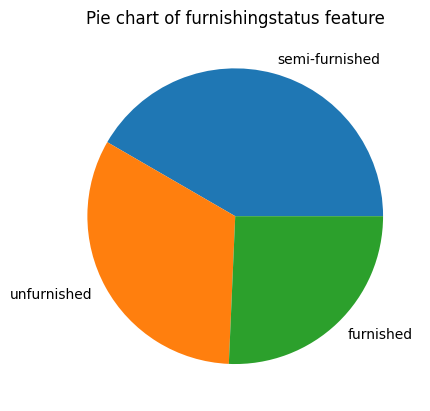

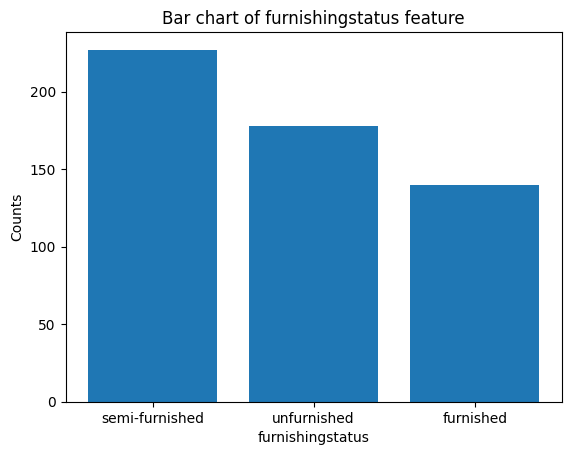

************************************************************


In [63]:
for column in df.columns:
    unique_values = df[column].unique()
    if 0 < unique_values.size <= 6:
        counts = df[column].value_counts()
        # Create a pie chart with the counts
        plt.pie(counts, labels=counts.index)
        plt.title(f"Pie chart of {column} feature")
        # Show the pie chart
        plt.show()

        # Create a bar chart with the counts
        plt.bar(counts.index, counts)
        plt.title(f"Bar chart of {column} feature")
        plt.xlabel(column)
        plt.ylabel("Counts")
        # Show the bar chart
        plt.show()

        print("***" * 20)

In [64]:
def encode_3(value):
    if value == 'furnished':
        return 2
    if value== 'unfurnished'  :
      return 0
    else:
        return 1



In [65]:
def encode_y_n(value):
    if value == 'yes':
        return 1
    else:
        return 0

In [66]:
for column in df.columns:
    unique_values_2 = df[column].unique()
    if unique_values_2.size == 2:
        print(column)
        print(unique_values_2)
        df[column] = df[column].apply(encode_y_n)



mainroad
['yes' 'no']
guestroom
['no' 'yes']
basement
['no' 'yes']
hotwaterheating
['no' 'yes']
airconditioning
['yes' 'no']
prefarea
['yes' 'no']


In [67]:
for column in df.columns:
    unique_values_3 = df[column].unique()
    if unique_values_3.size == 3:
        print(column)
        print(unique_values_3)
        df[column] = df[column].apply(encode_3)



furnishingstatus
['furnished' 'semi-furnished' 'unfurnished']


In [68]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2


<Axes: >

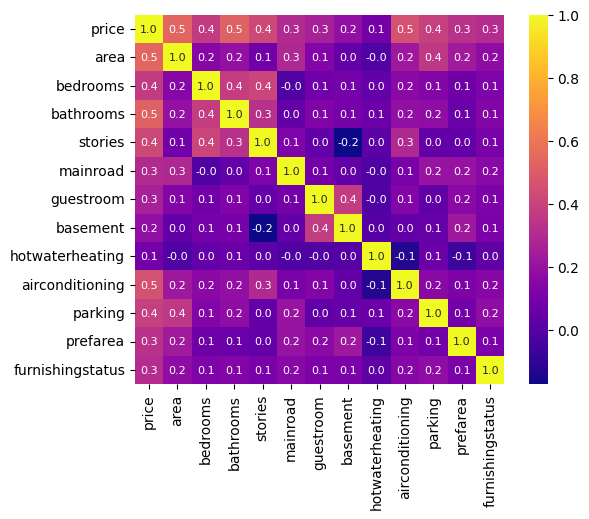

In [69]:
sns.heatmap(df.corr(), cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='plasma')

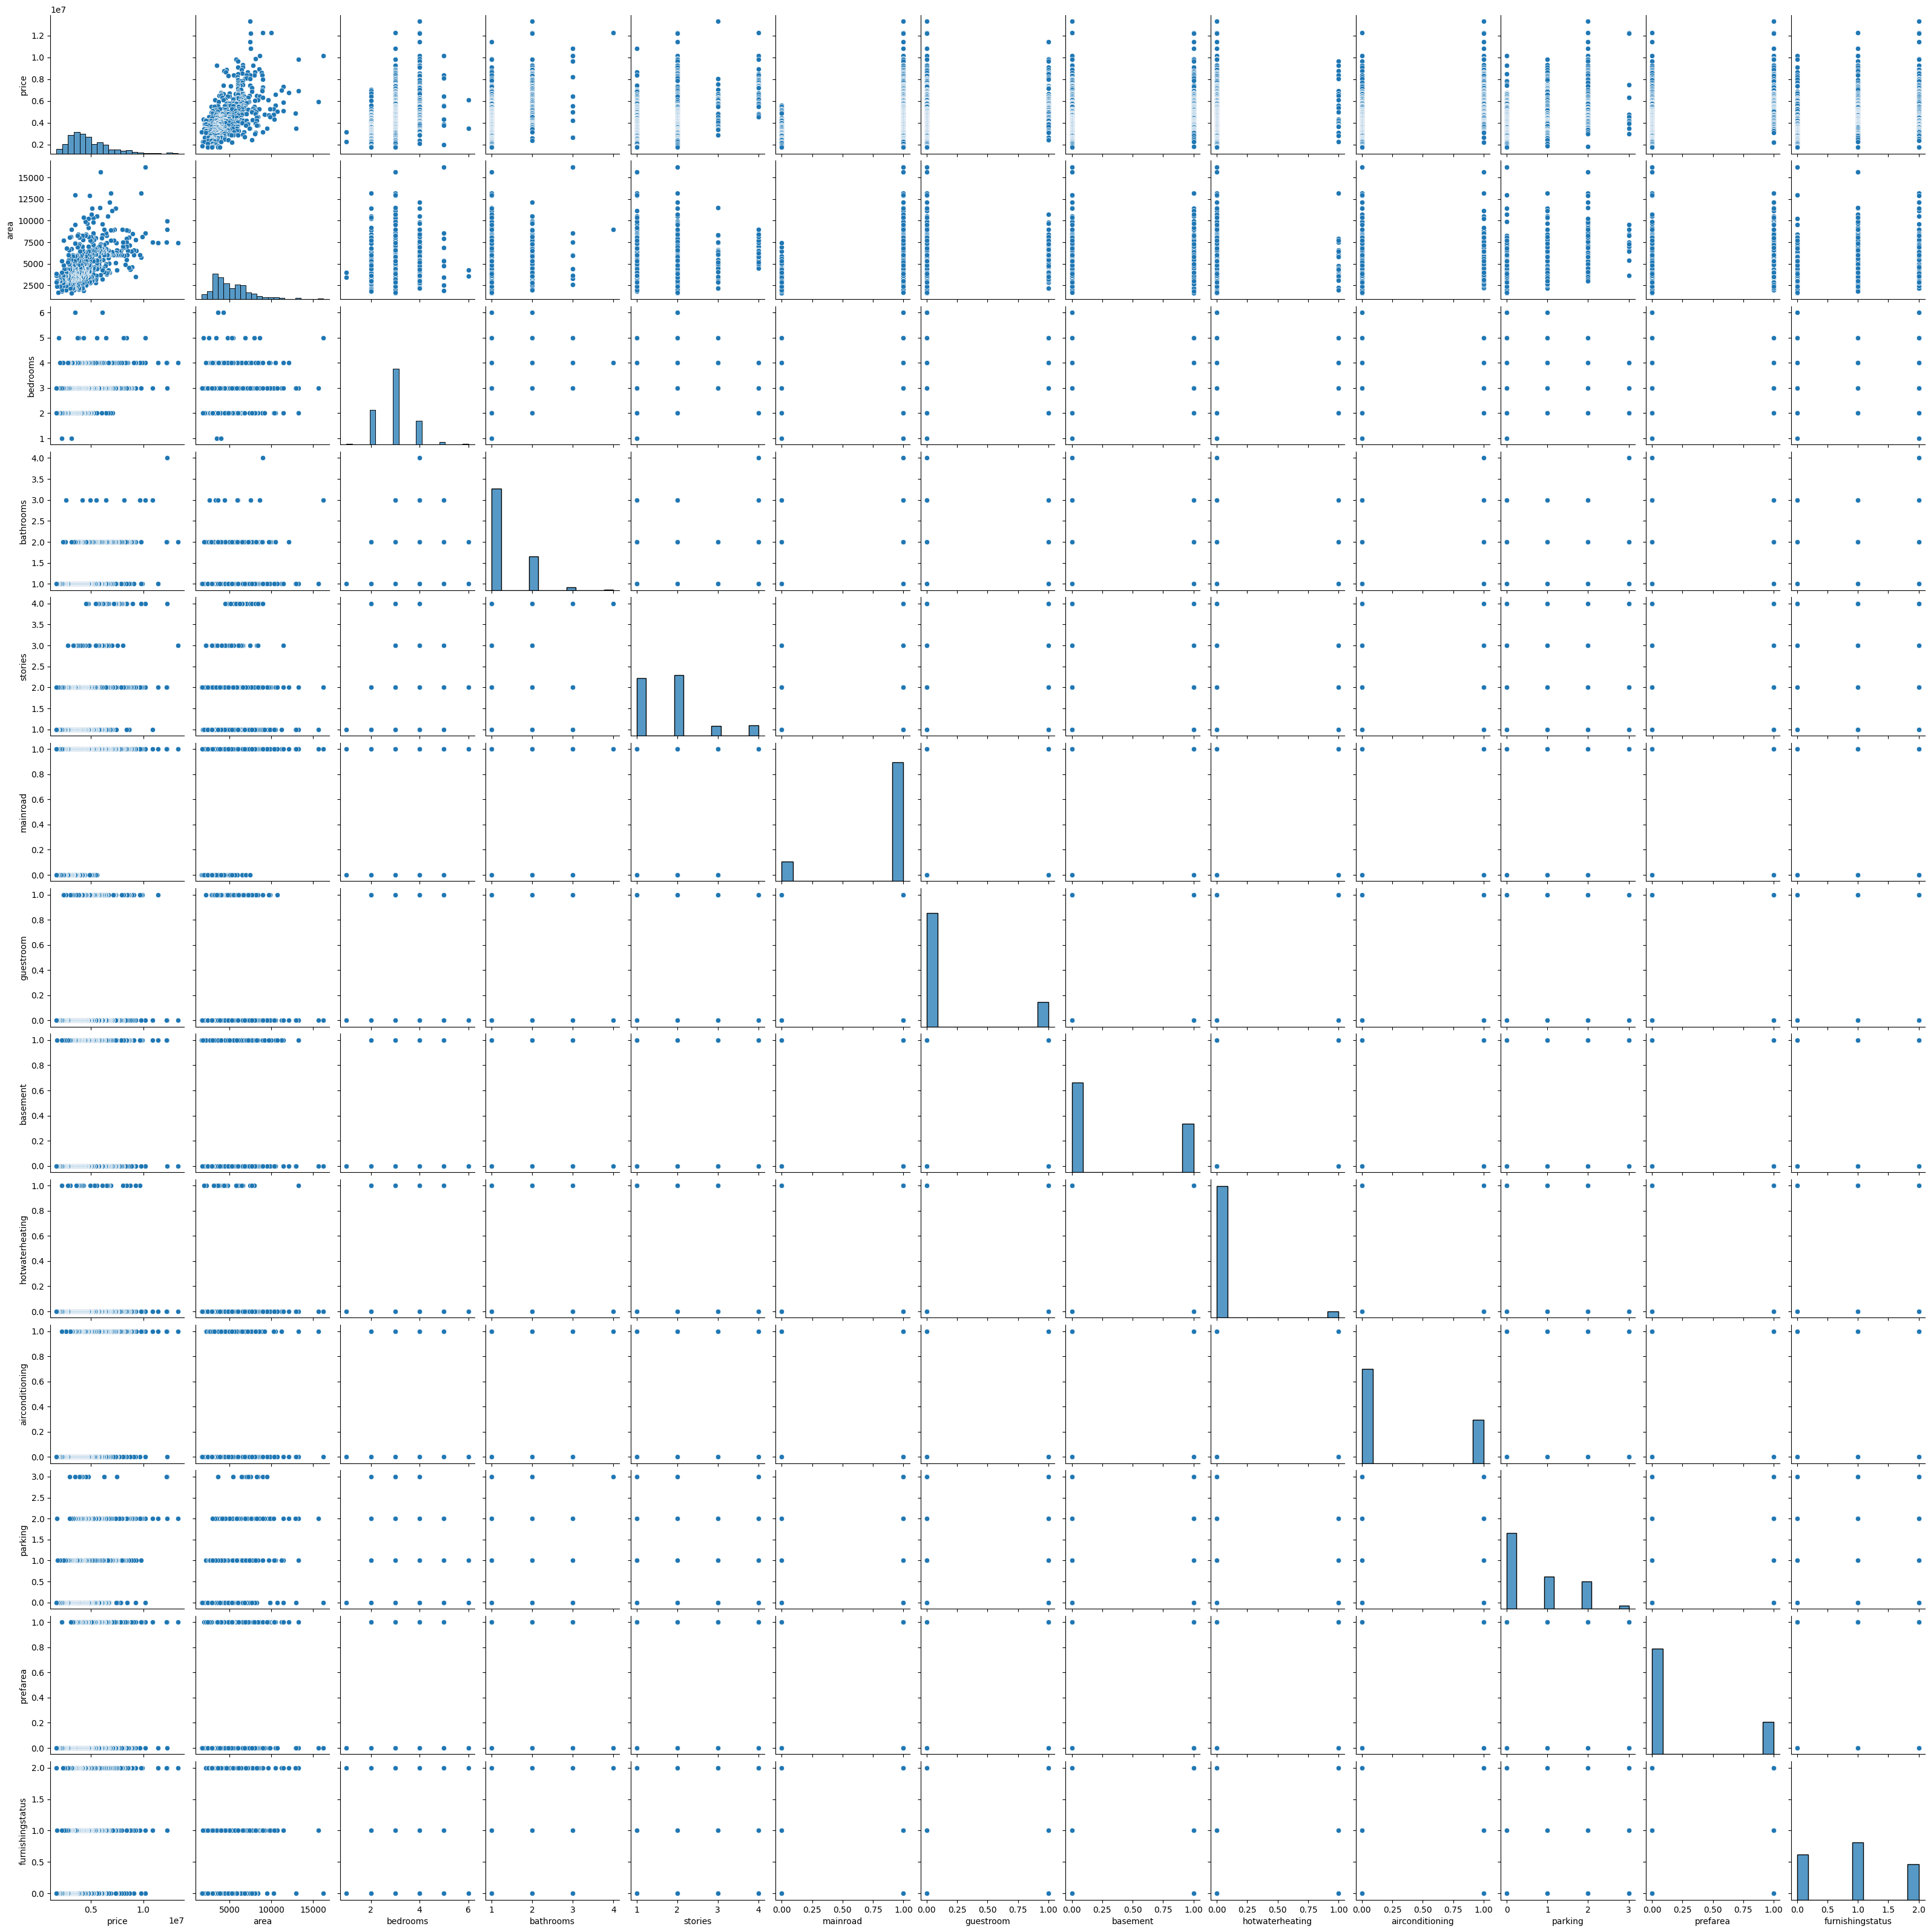

In [70]:
sns.pairplot(df)
plt.show()

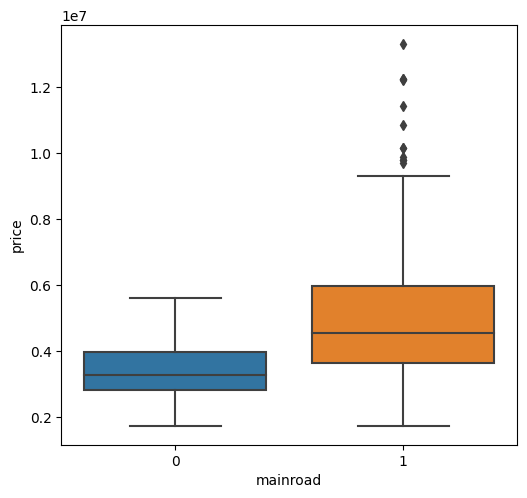

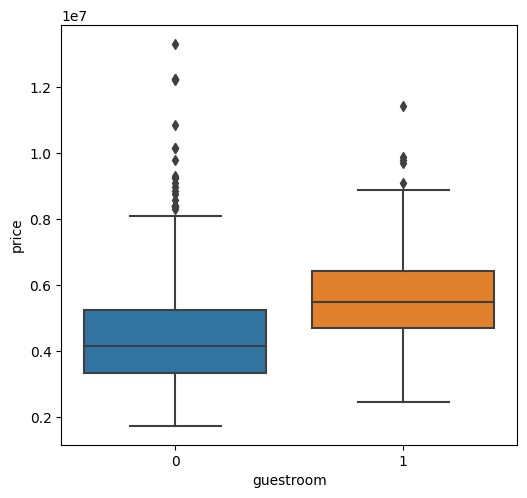

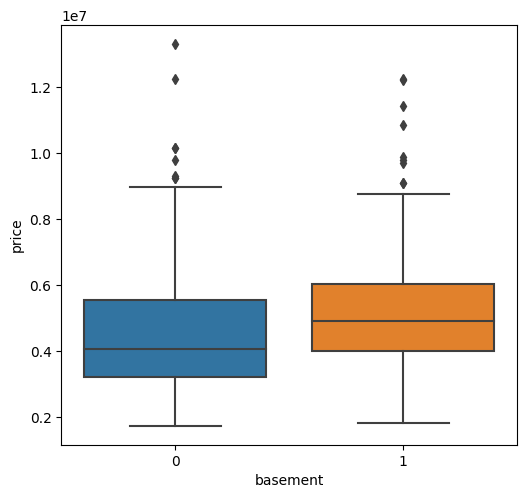

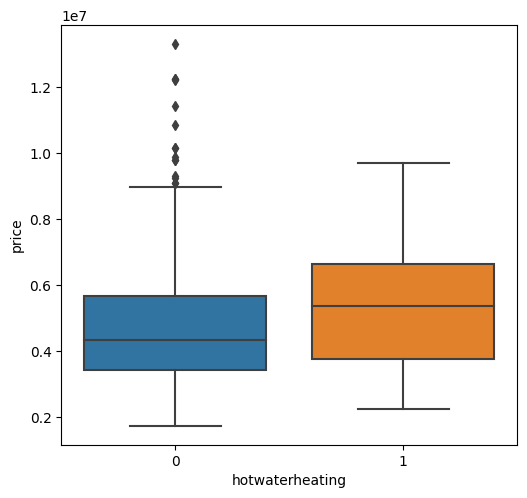

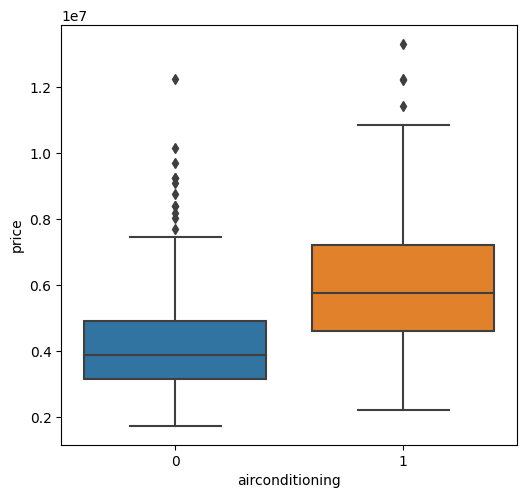

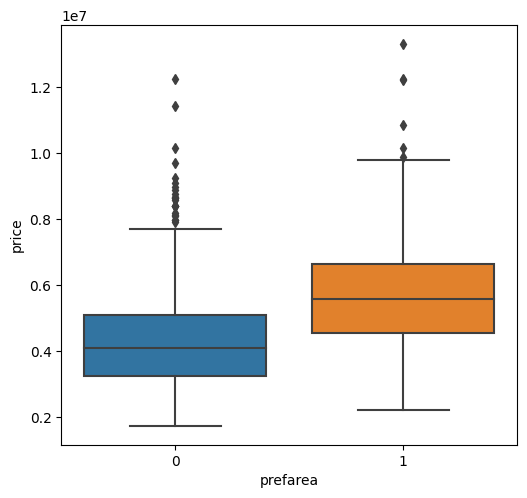

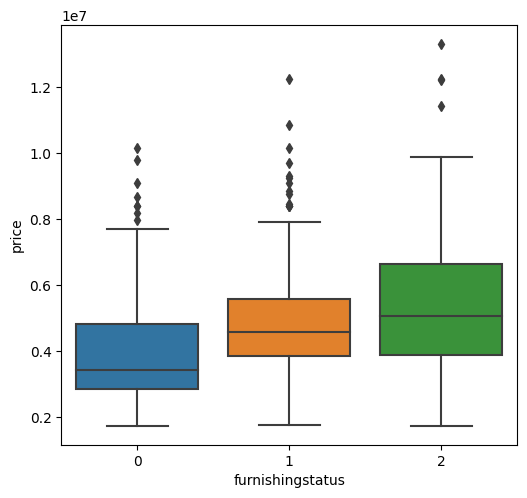

In [71]:
for column in df.columns:
    unique_values_2 = df[column].unique()
    if 0< unique_values_2.size <= 3:
        plt.figure(figsize=(20, 12))
        plt.subplot(2,3,1)
        sns.boxplot(x = column, y = 'price', data = df )
        plt.show()


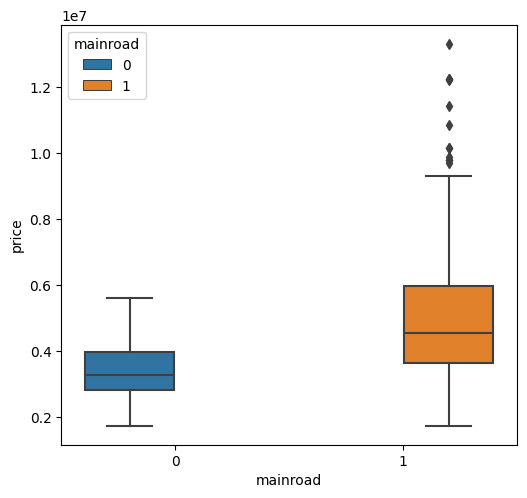

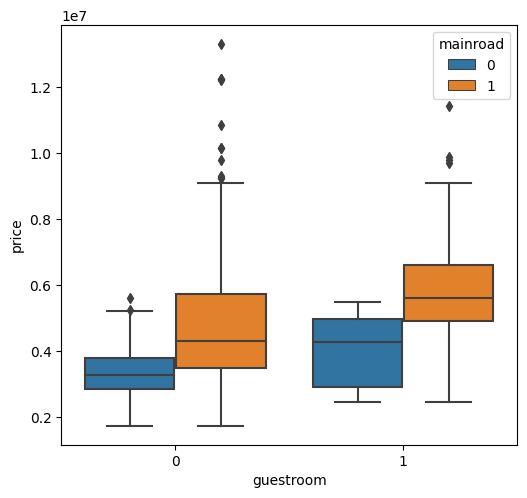

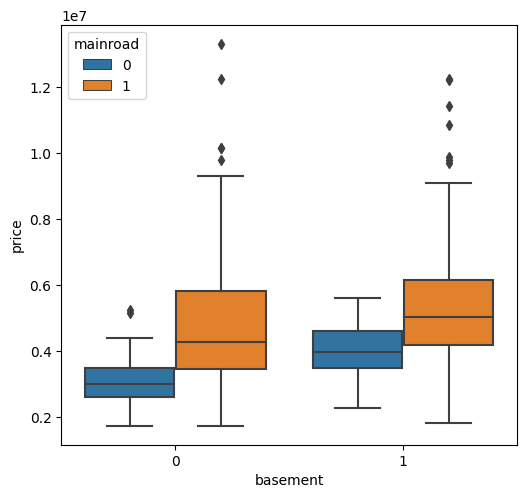

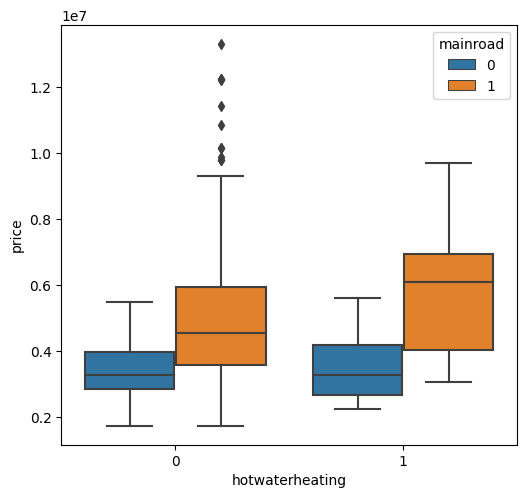

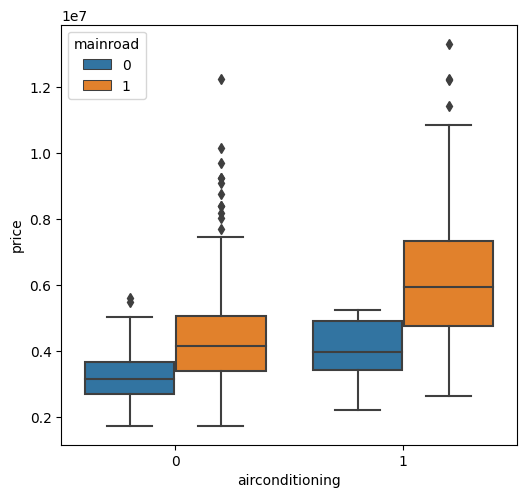

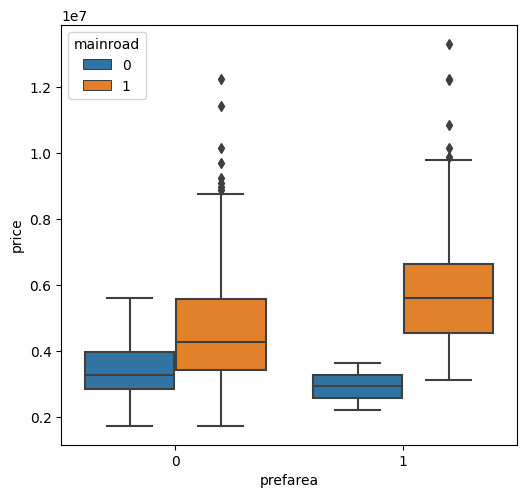

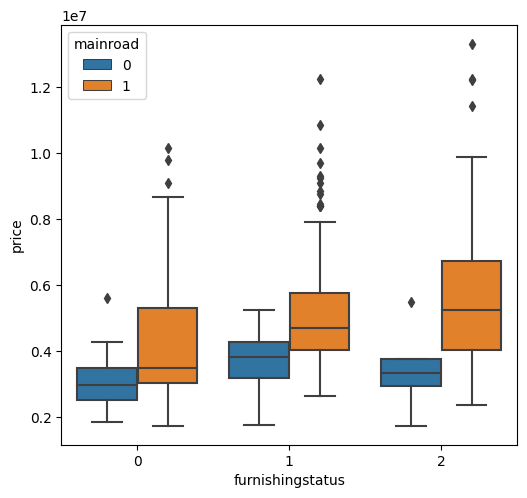

In [72]:
for column in df.columns:
    unique_values_2 = df[column].unique()
    if 0< unique_values_2.size <= 3:
        plt.figure(figsize=(20, 12))
        plt.subplot(2,3,1)
        sns.boxplot(x = column, y = 'price', hue = 'mainroad', data = df)
        plt.show()


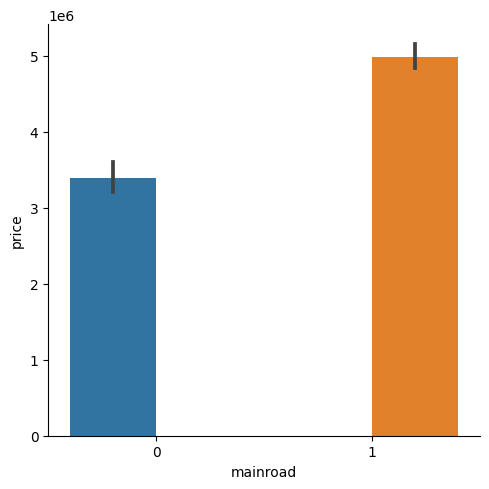

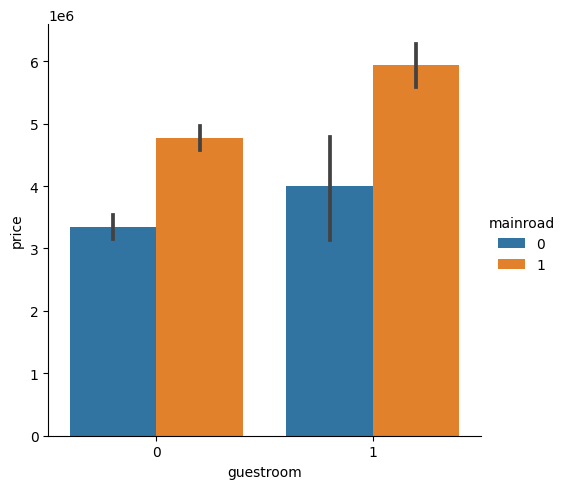

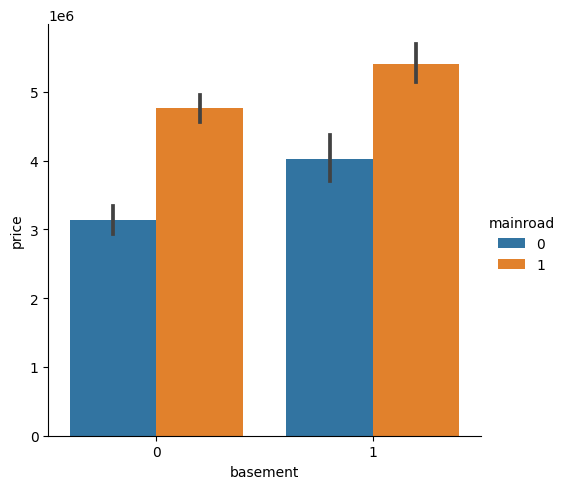

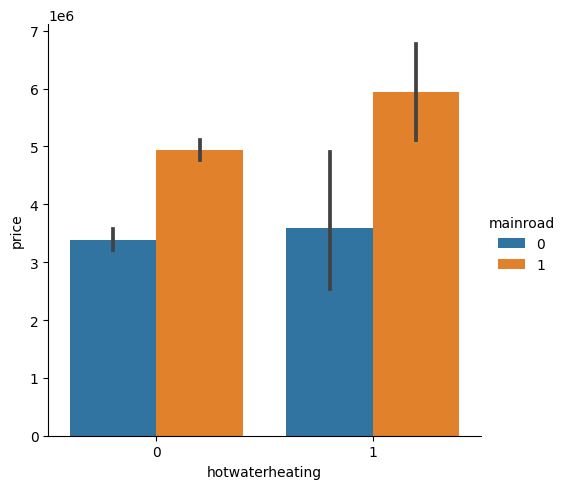

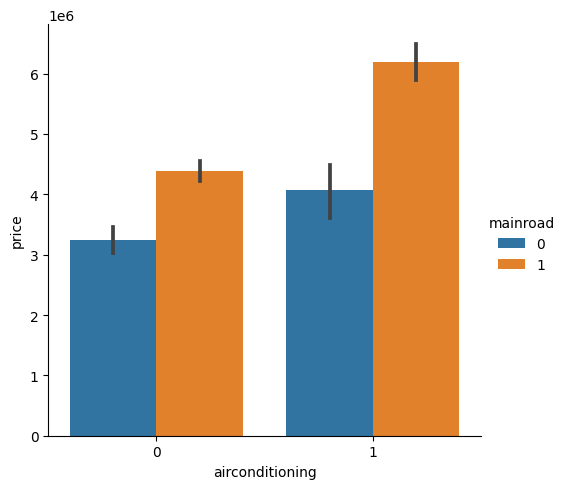

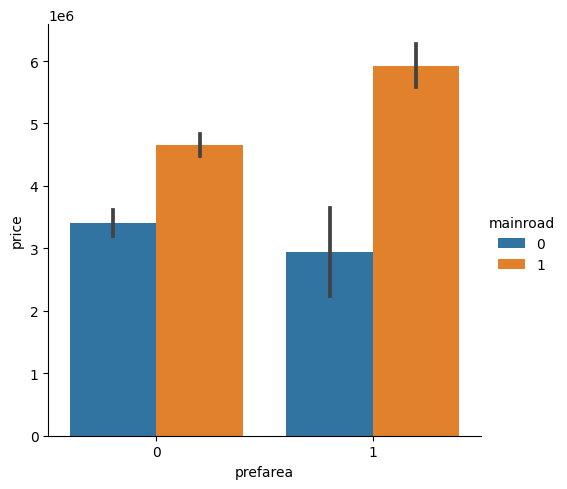

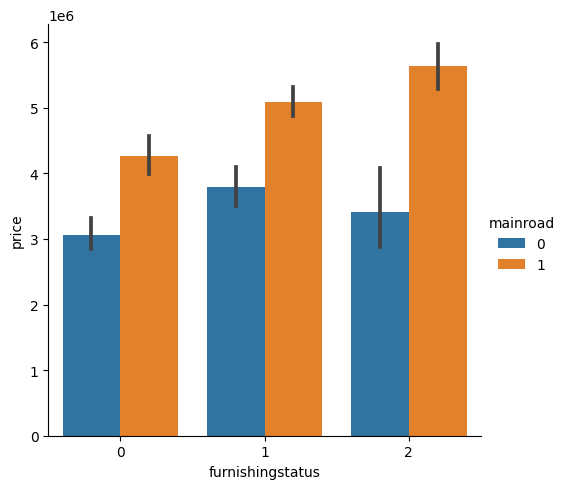

In [73]:
for column in df.columns:
    unique_values_2 = df[column].unique()
    if 0< unique_values_2.size <= 3:
        sns.catplot(x = column, y = 'price', hue = 'mainroad', data = df, kind='bar')
        plt.show()


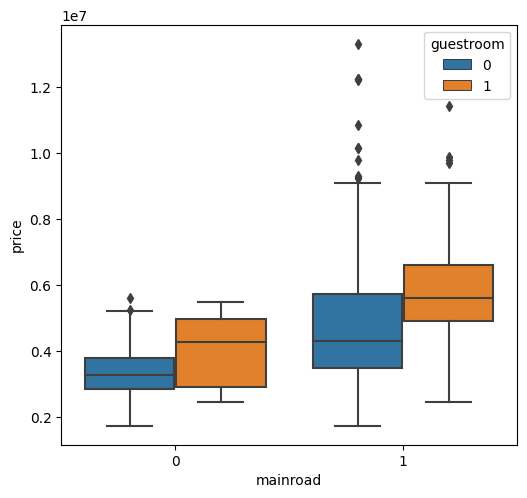

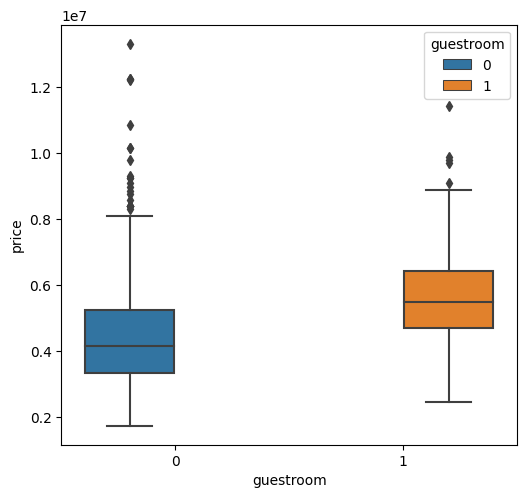

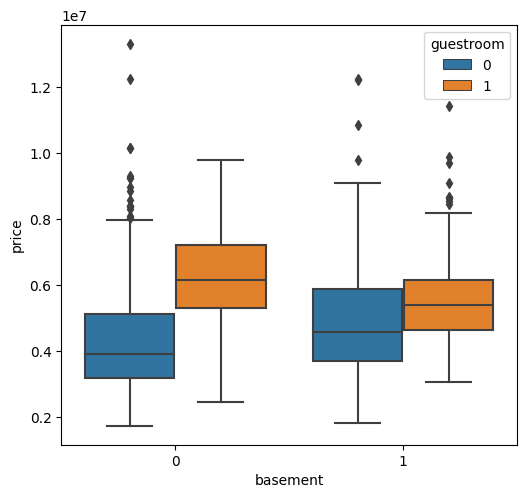

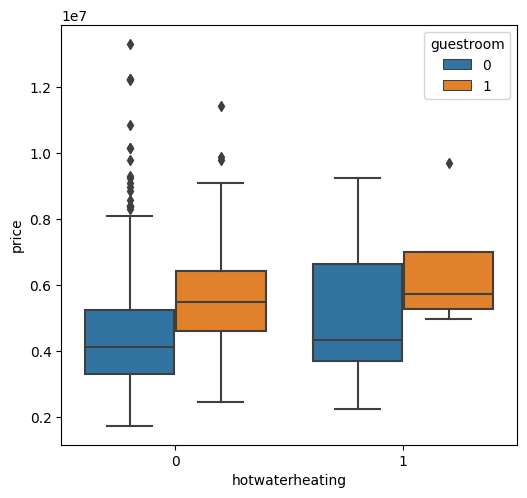

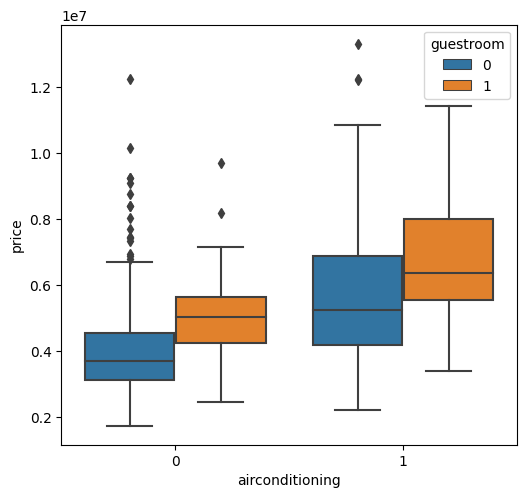

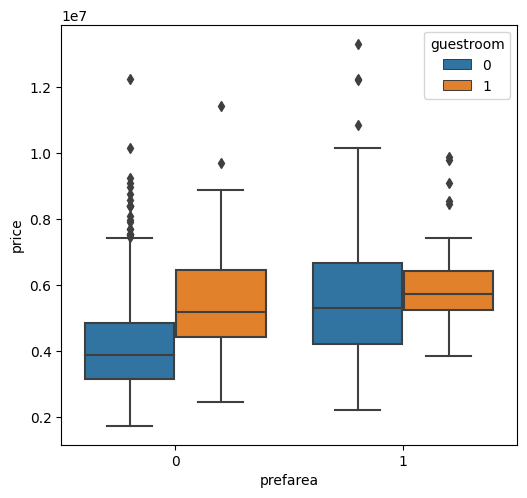

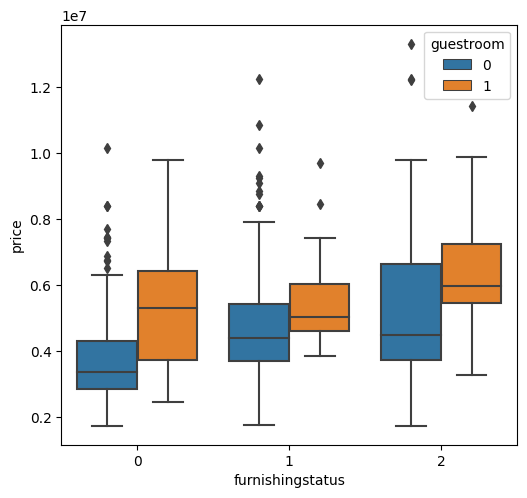

In [74]:
for column in df.columns:
    unique_values_2 = df[column].unique()
    if 0< unique_values_2.size <= 3:
        plt.figure(figsize=(20, 12))
        plt.subplot(2,3,1)
        sns.boxplot(x = column, y = 'price', hue = 'guestroom', data = df)
        plt.show()


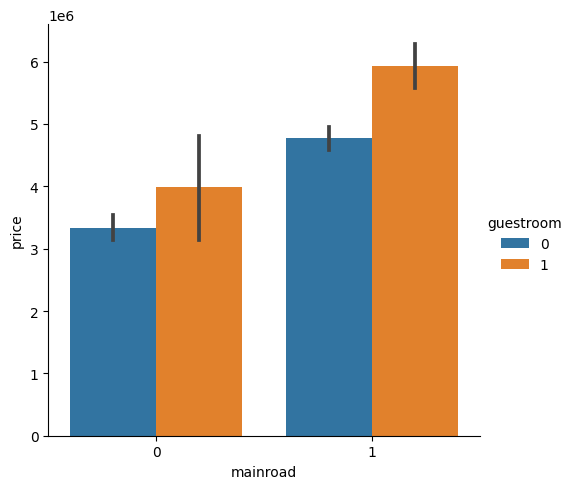

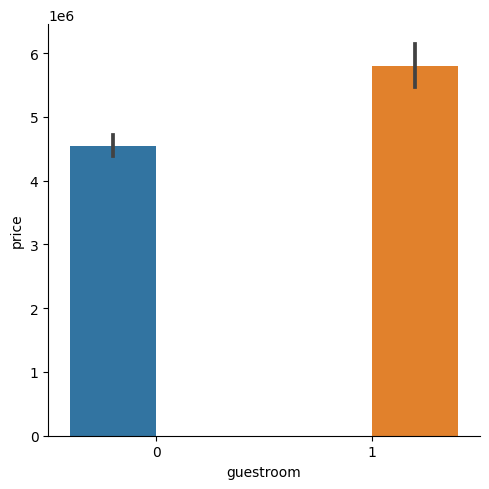

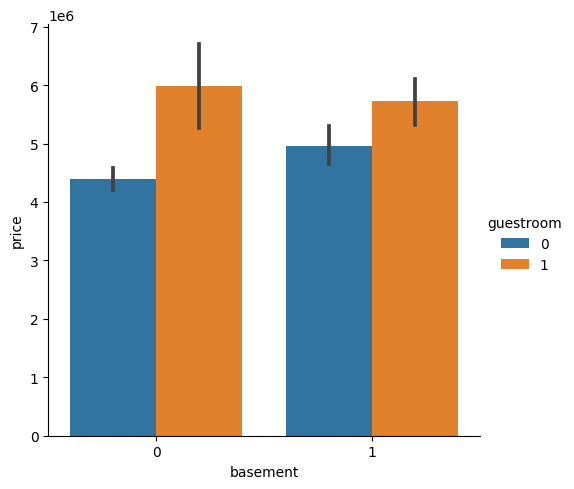

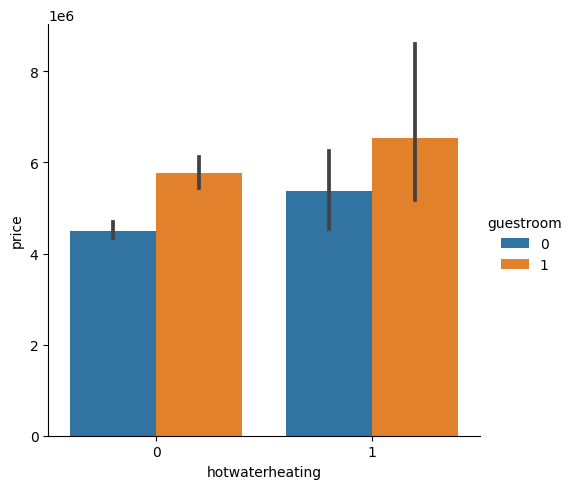

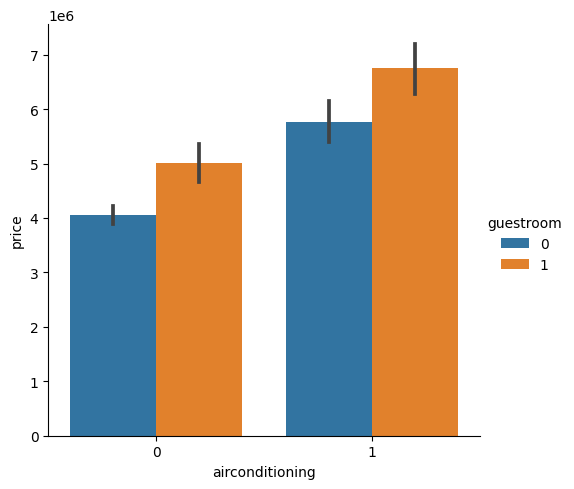

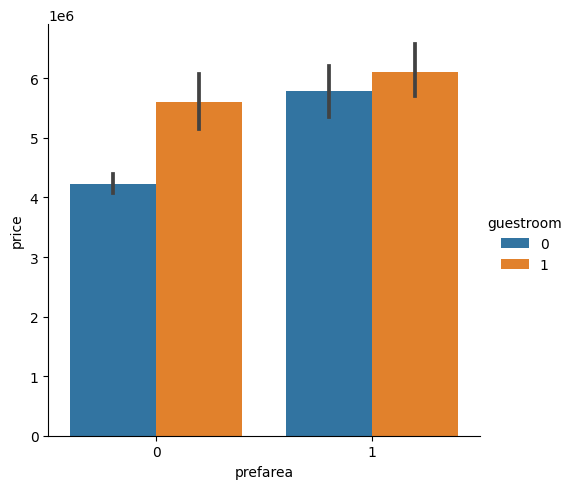

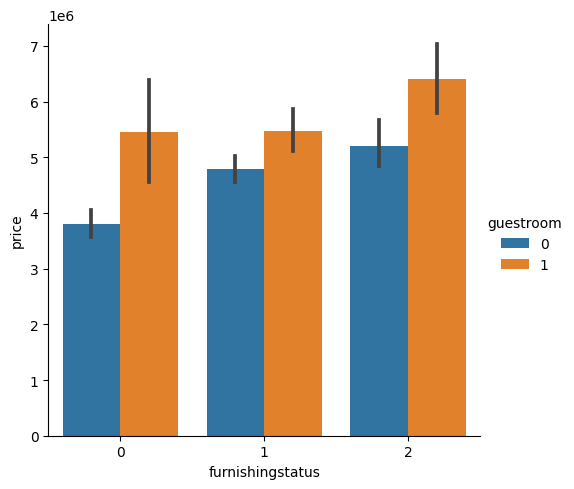

In [75]:
for column in df.columns:
    unique_values_2 = df[column].unique()
    if 0< unique_values_2.size <= 3:
        sns.catplot(x = column, y = 'price', hue = 'guestroom', data = df, kind='bar')
        plt.show()


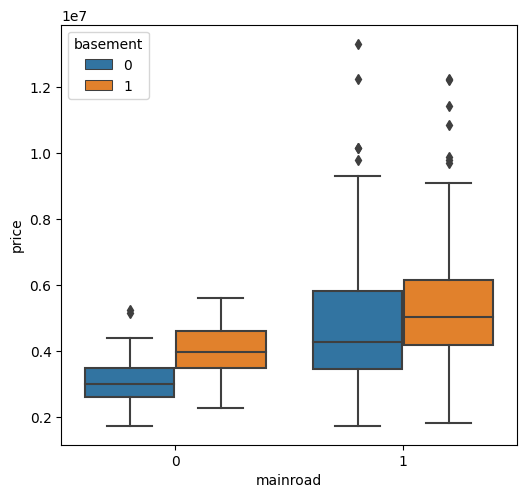

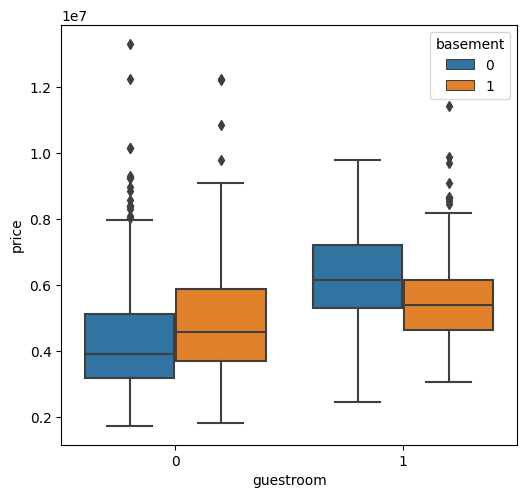

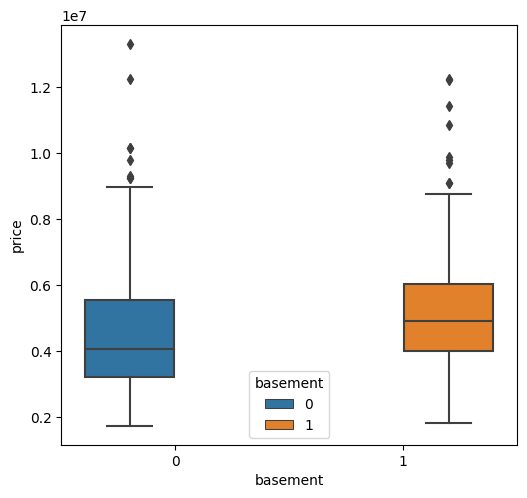

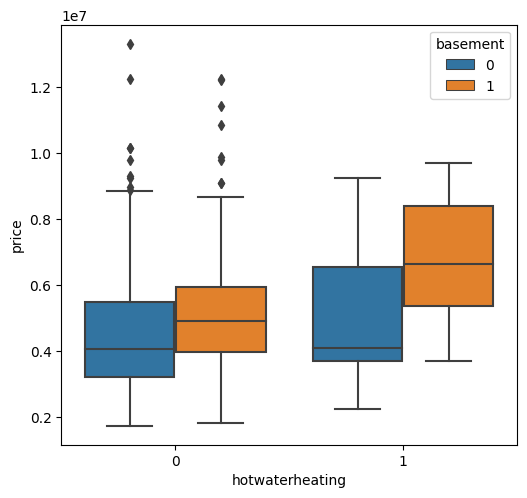

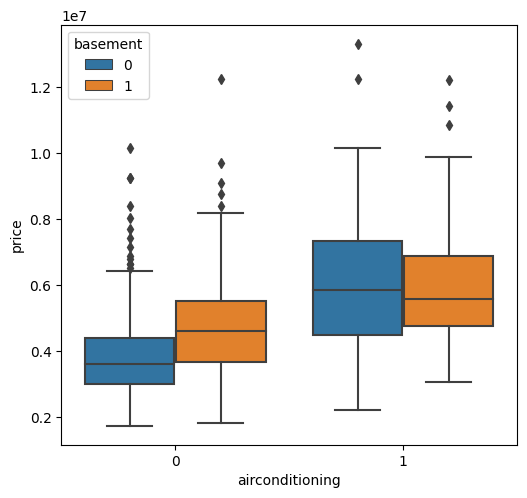

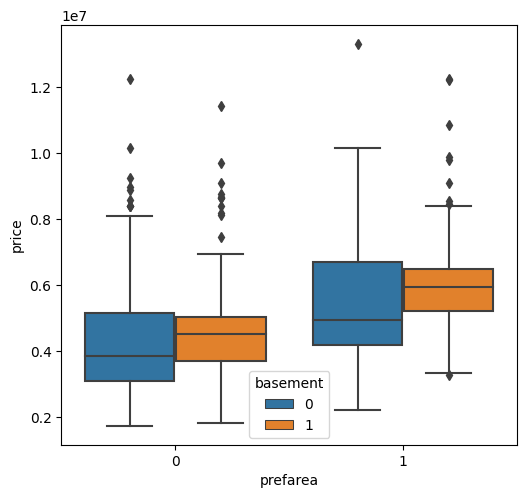

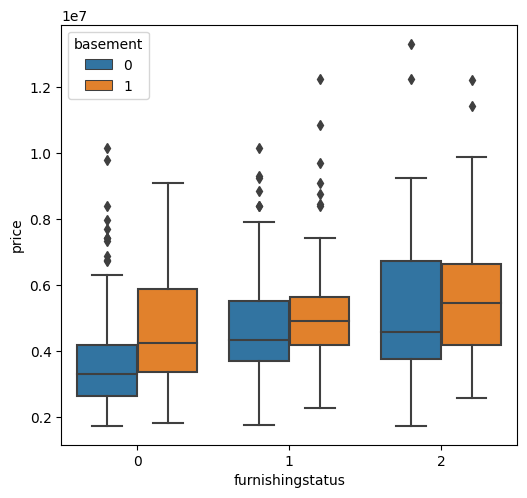

In [76]:
for column in df.columns:
    unique_values_2 = df[column].unique()
    if 0< unique_values_2.size <= 3:
        plt.figure(figsize=(20, 12))
        plt.subplot(2,3,1)
        sns.boxplot(x = column, y = 'price', hue = 'basement', data = df)
        plt.show()


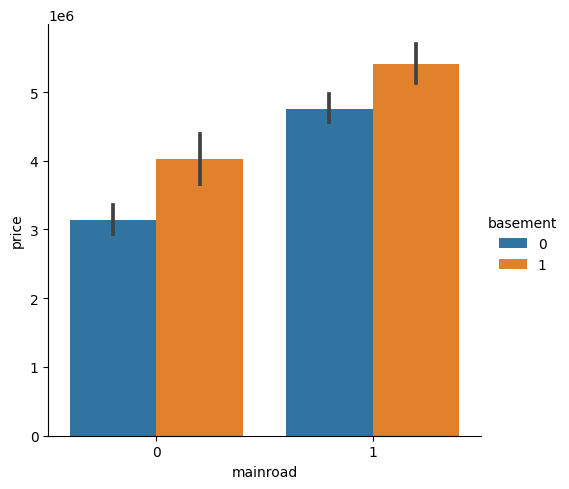

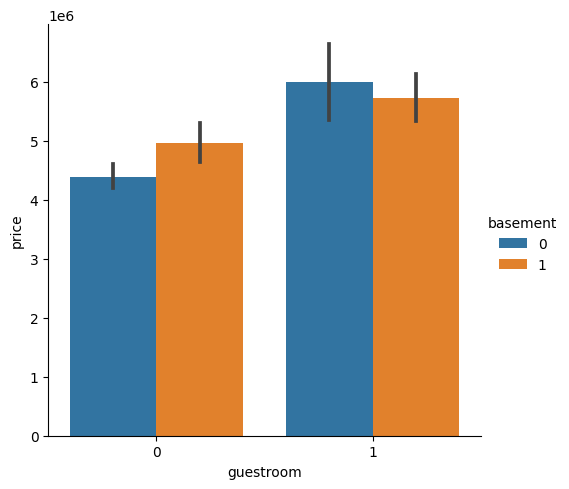

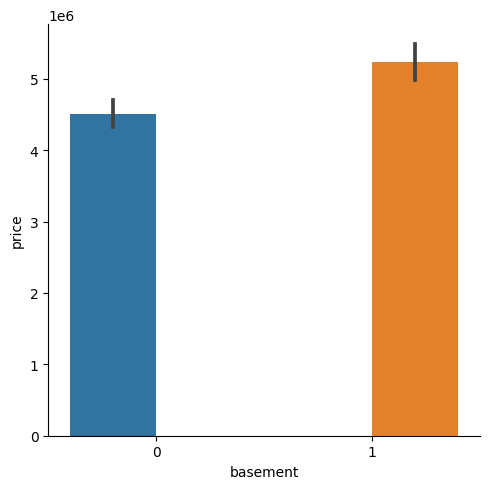

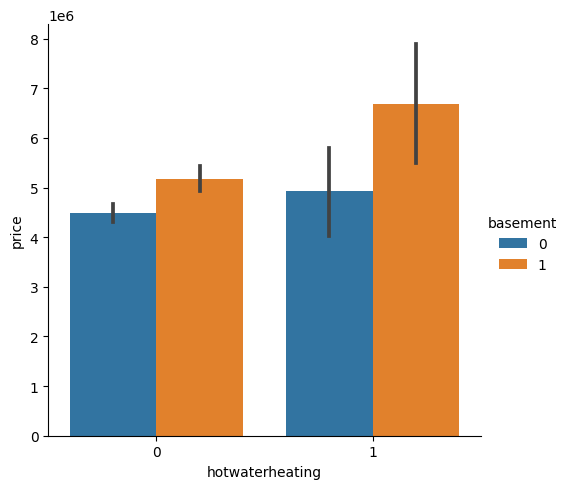

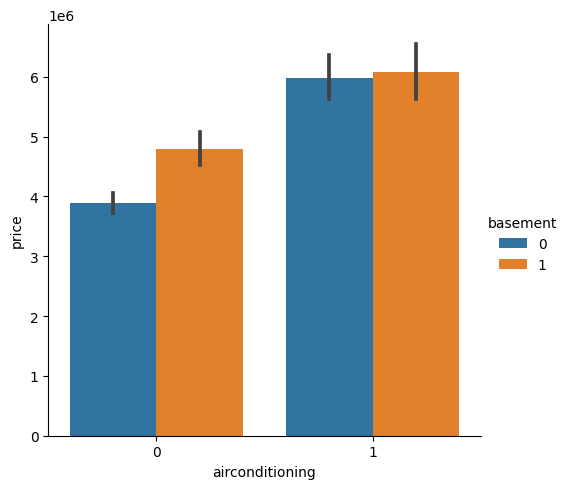

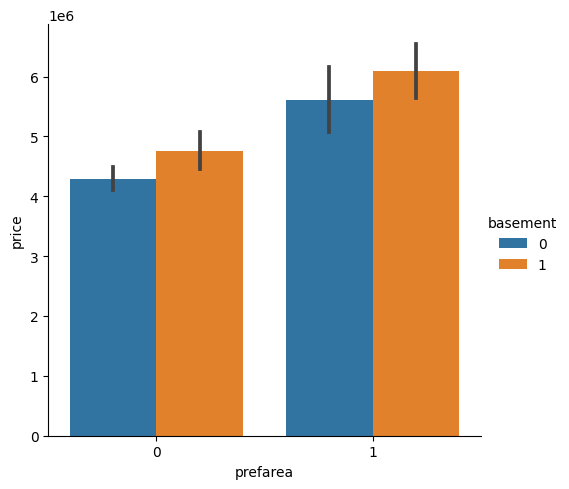

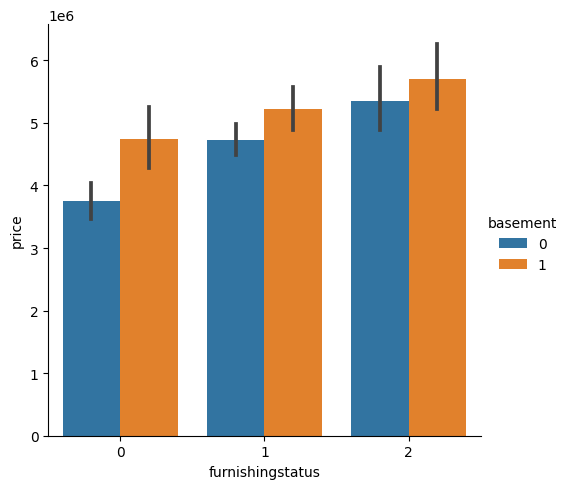

In [77]:
for column in df.columns:
    unique_values_2 = df[column].unique()
    if 0< unique_values_2.size <= 3:
        sns.catplot(x = column, y = 'price', hue = 'basement', data = df, kind='bar')
        plt.show()


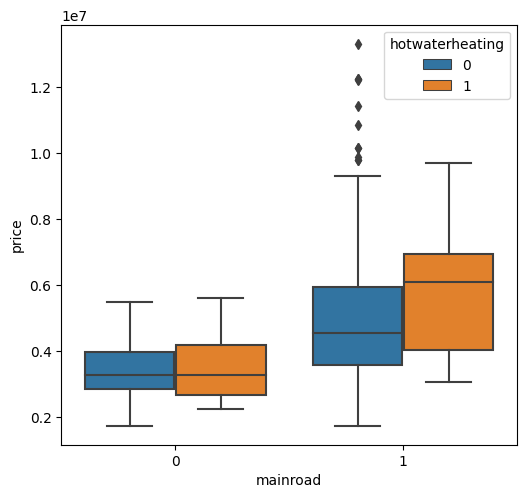

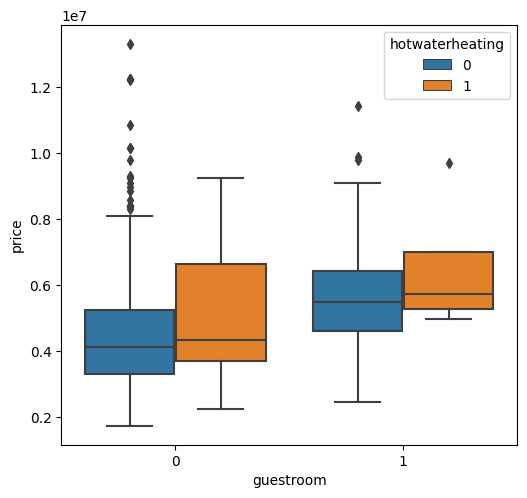

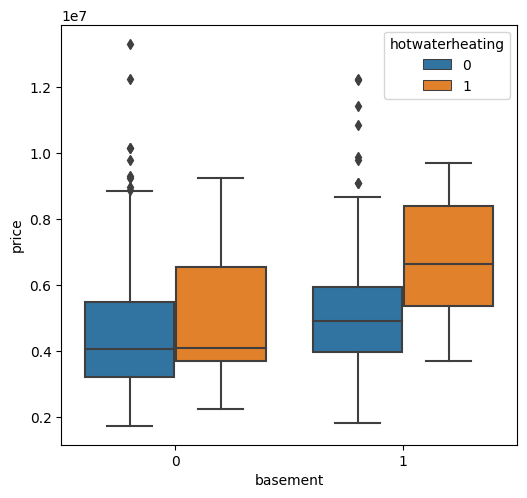

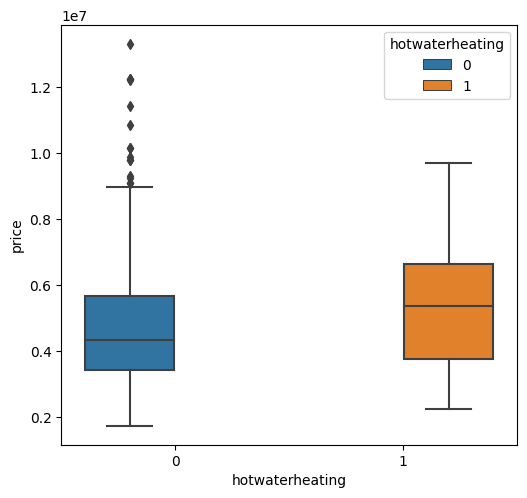

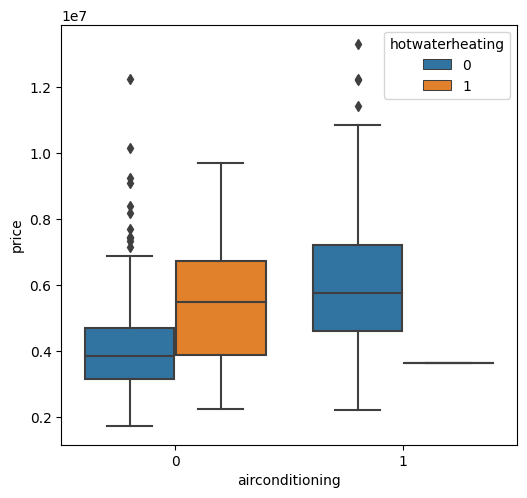

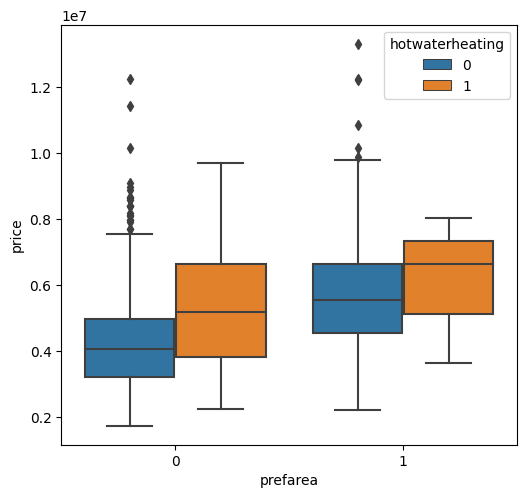

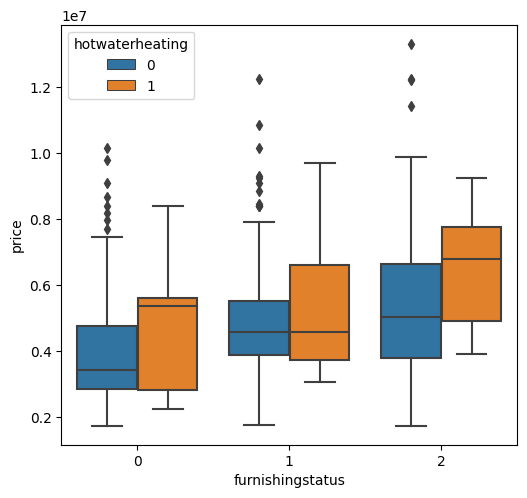

In [78]:
for column in df.columns:
    unique_values_2 = df[column].unique()
    if 0< unique_values_2.size <= 3:
        plt.figure(figsize=(20, 12))
        plt.subplot(2,3,1)
        sns.boxplot(x = column, y = 'price', hue = 'hotwaterheating', data = df)
        plt.show()


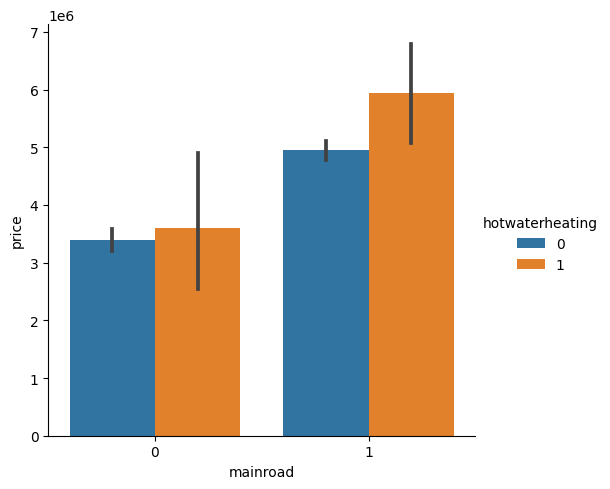

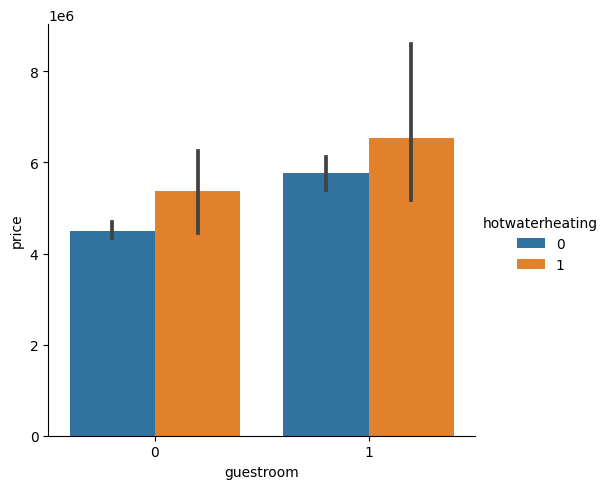

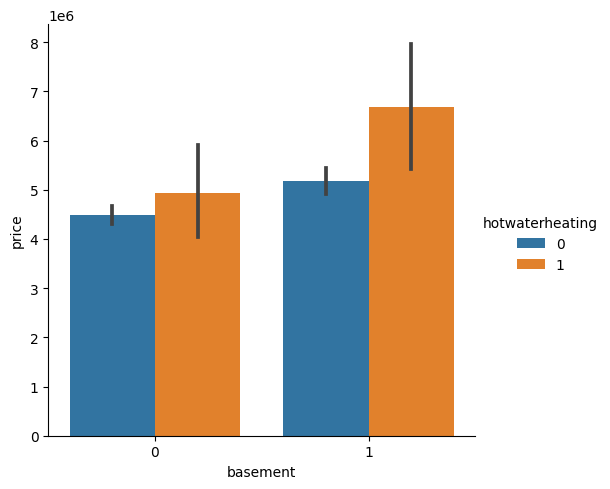

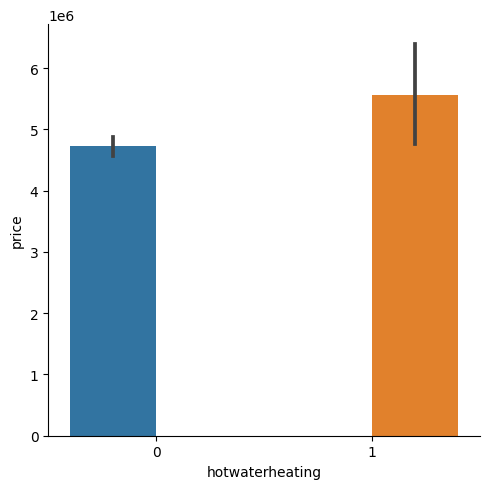

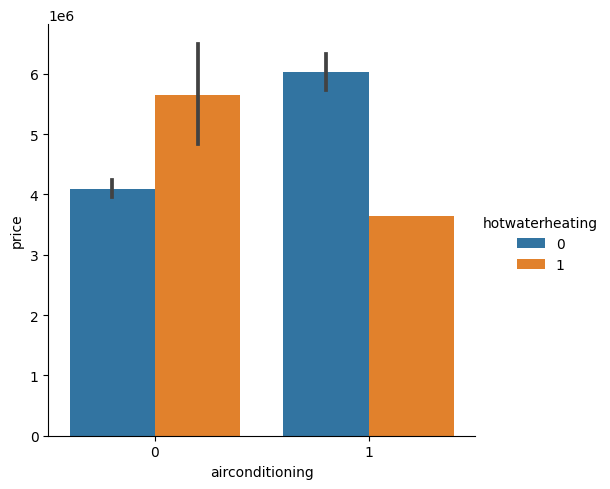

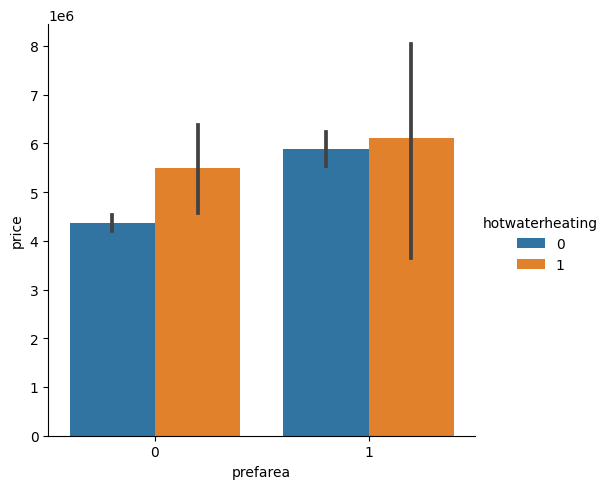

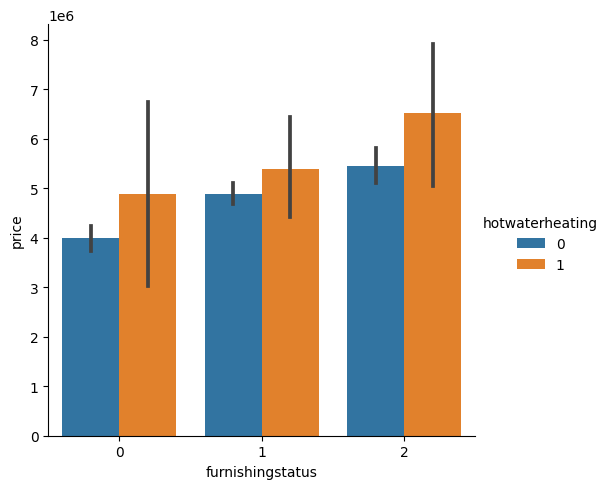

In [79]:
for column in df.columns:
    unique_values_2 = df[column].unique()
    if 0< unique_values_2.size <= 3:
        sns.catplot(x = column, y = 'price', hue = 'hotwaterheating', data = df, kind='bar')
        plt.show()


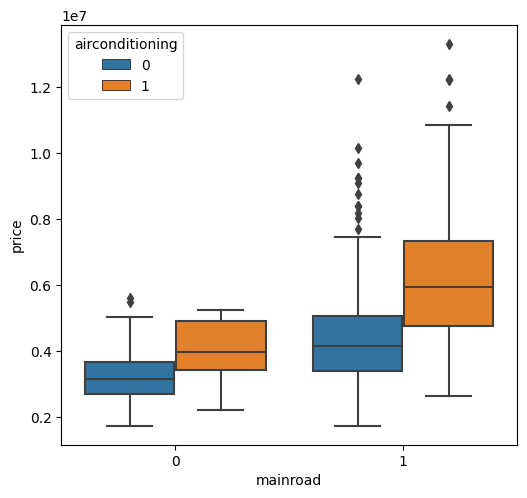

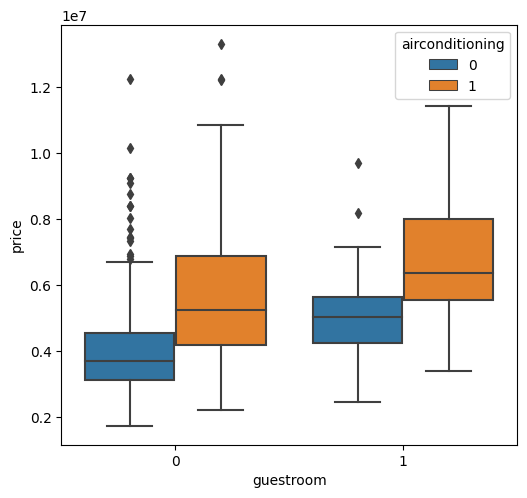

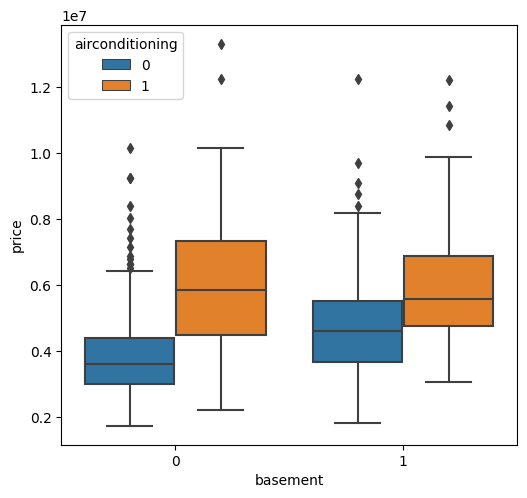

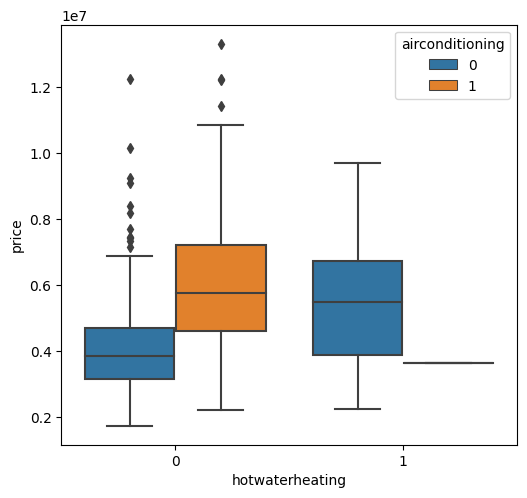

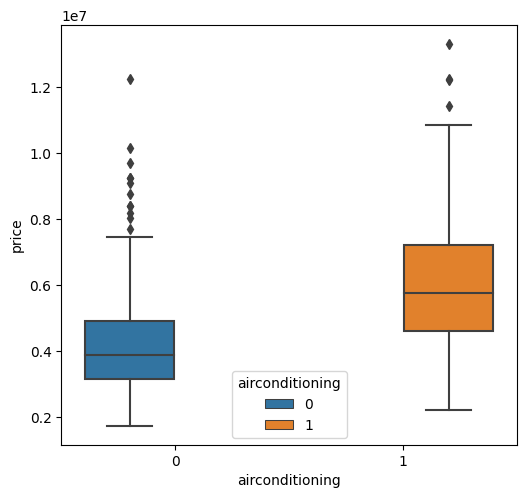

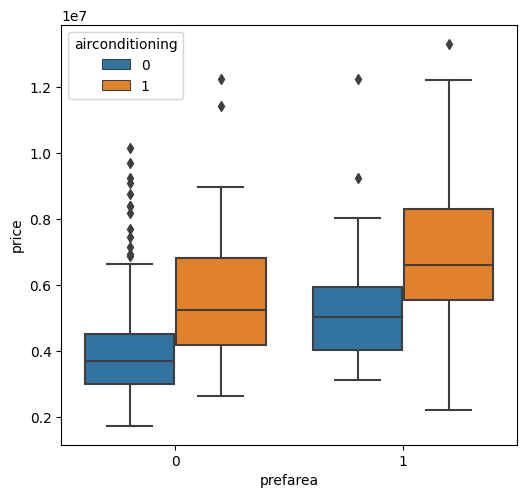

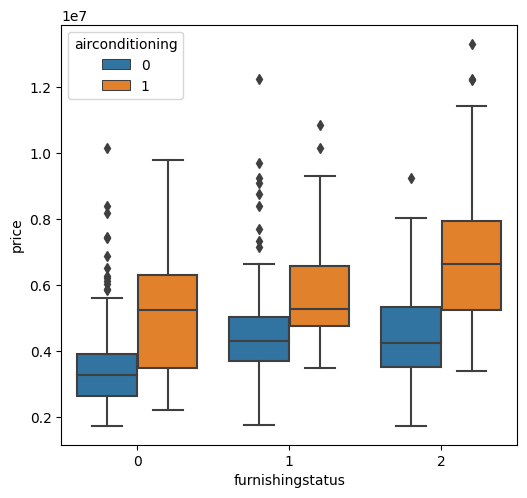

In [80]:
for column in df.columns:
    unique_values_2 = df[column].unique()
    if 0< unique_values_2.size <= 3:
        plt.figure(figsize=(20, 12))
        plt.subplot(2,3,1)
        sns.boxplot(x = column, y = 'price', hue = 'airconditioning', data = df)
        plt.show()


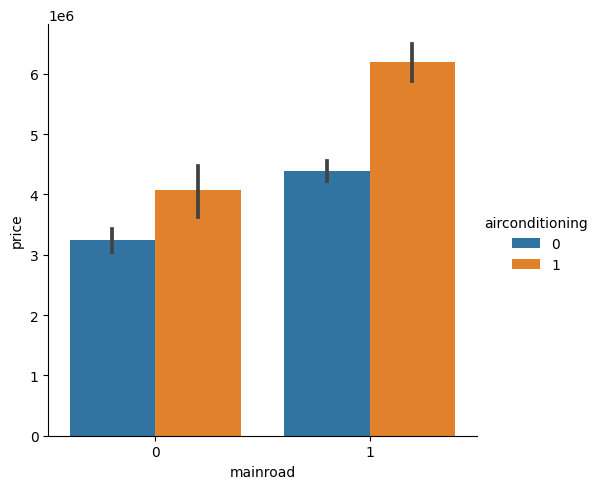

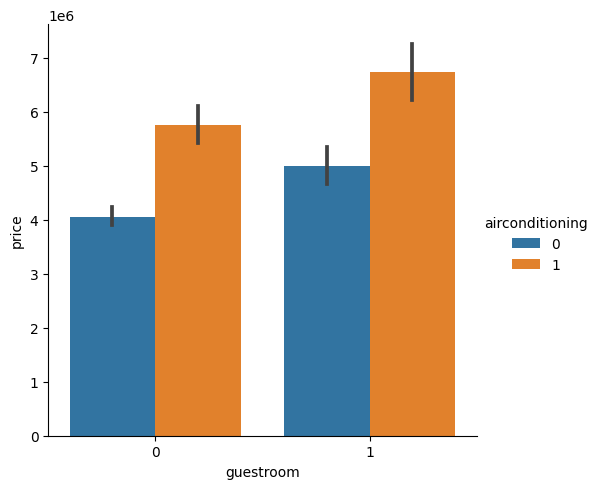

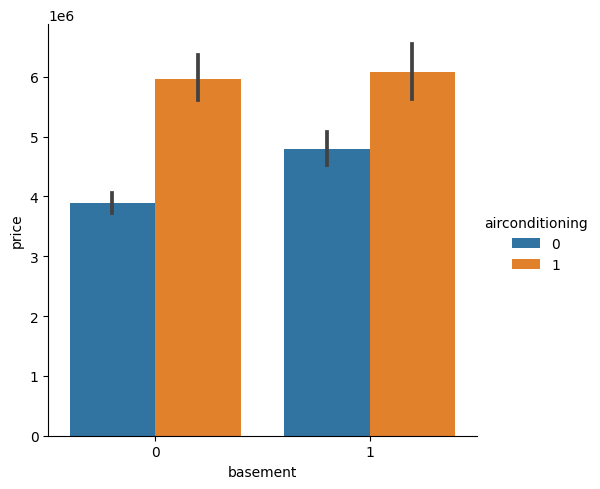

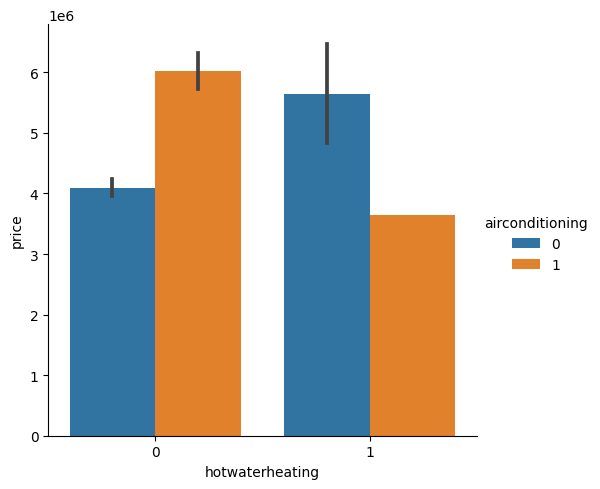

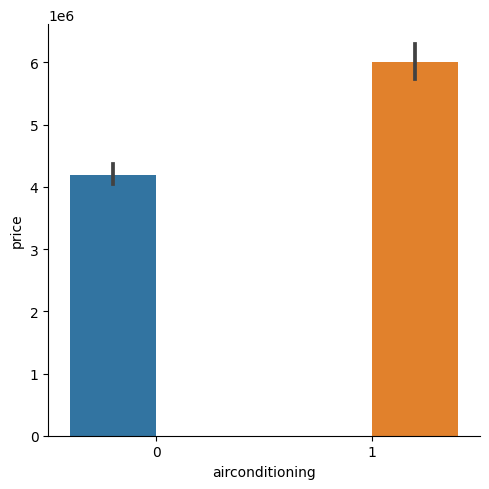

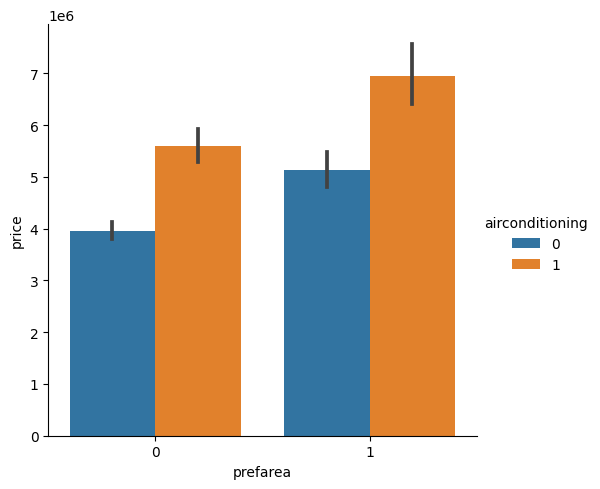

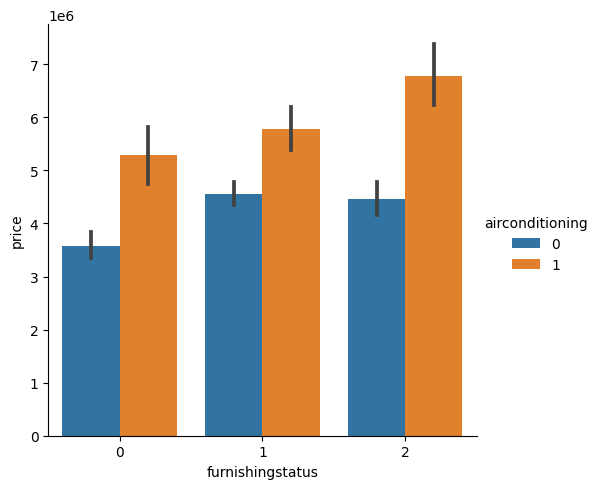

In [81]:
for column in df.columns:
    unique_values_2 = df[column].unique()
    if 0< unique_values_2.size <= 3:
        sns.catplot(x = column, y = 'price', hue = 'airconditioning', data = df, kind='bar')
        plt.show()


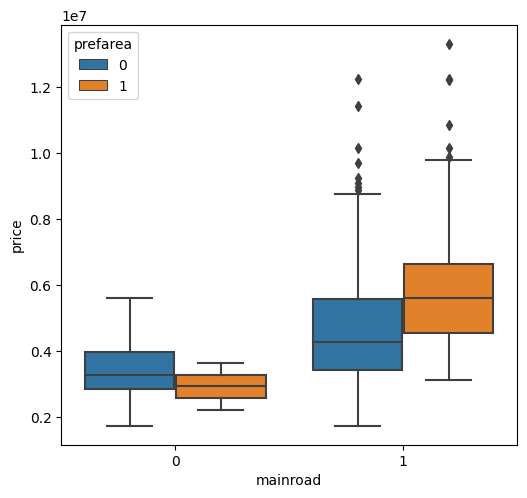

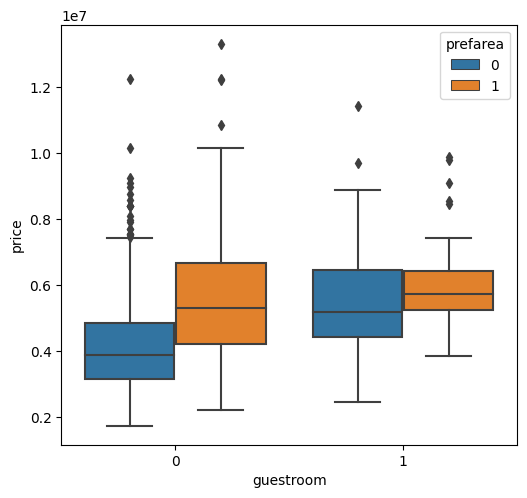

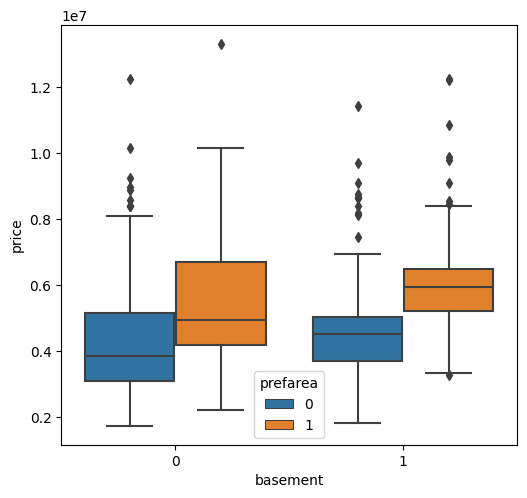

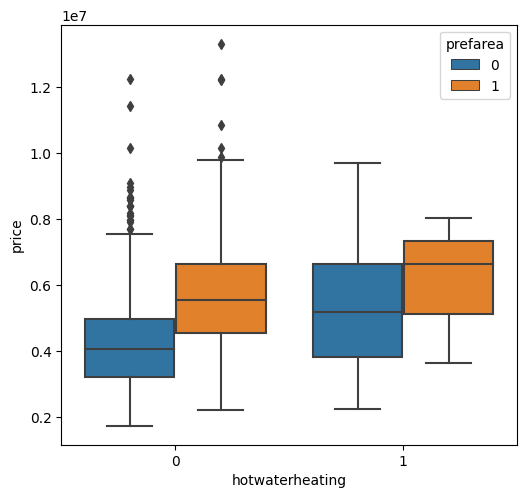

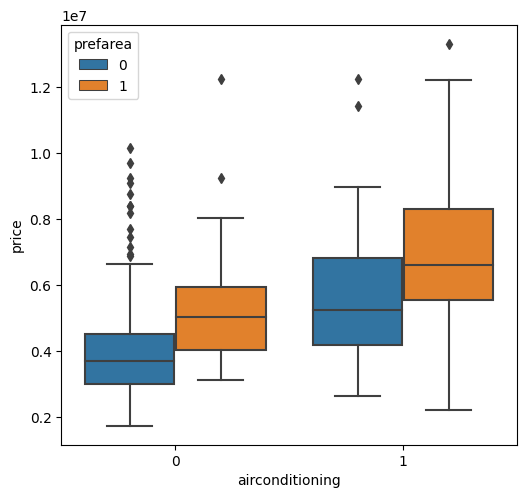

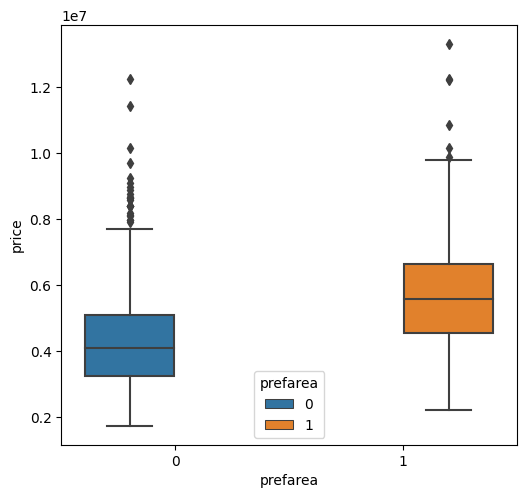

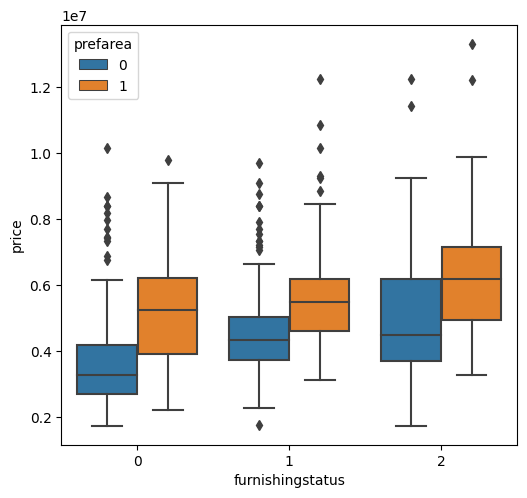

In [82]:
for column in df.columns:
    unique_values_2 = df[column].unique()
    if 0< unique_values_2.size <= 3:
        plt.figure(figsize=(20, 12))
        plt.subplot(2,3,1)
        sns.boxplot(x = column, y = 'price', hue = 'prefarea', data = df)
        plt.show()


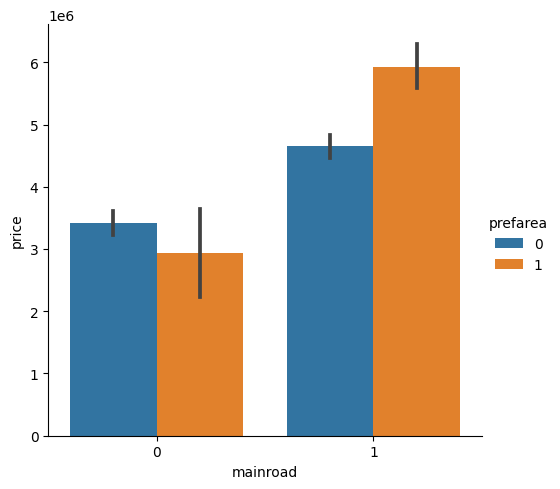

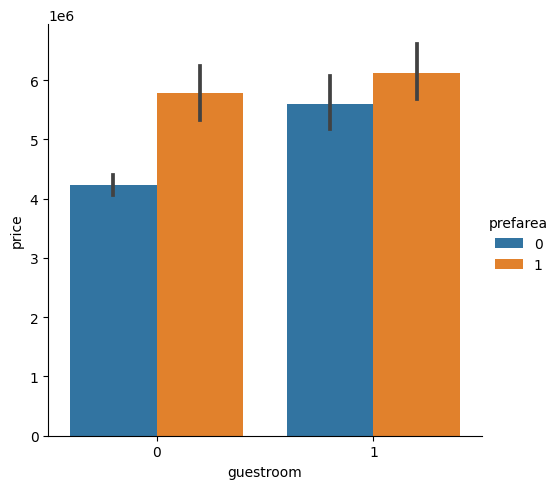

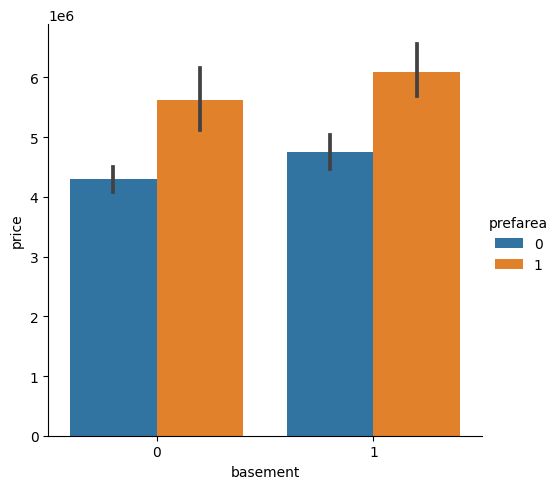

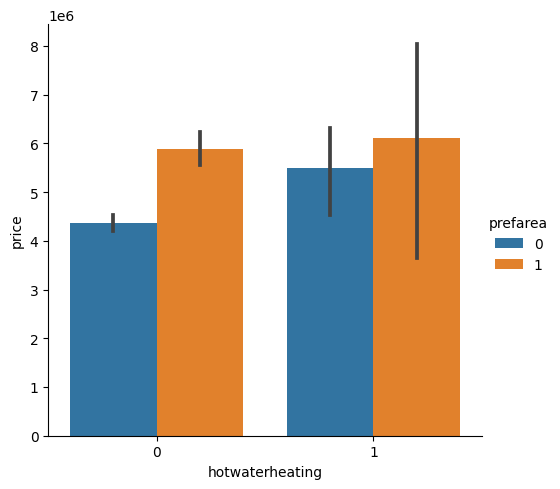

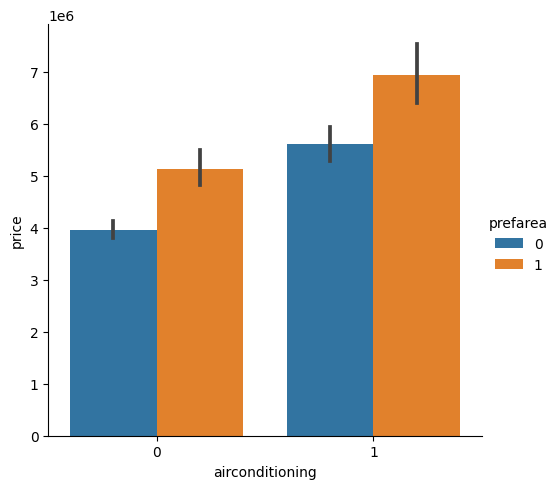

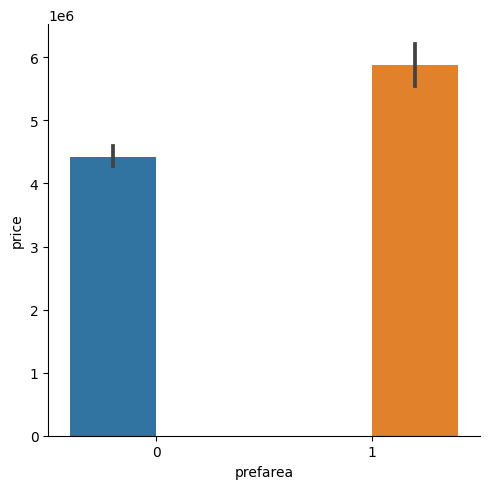

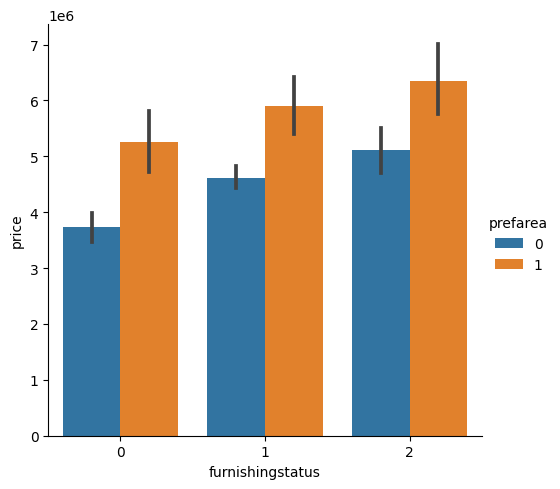

In [83]:
for column in df.columns:
    unique_values_2 = df[column].unique()
    if 0< unique_values_2.size <= 3:
        sns.catplot(x = column, y = 'price', hue = 'prefarea', data = df, kind='bar')
        plt.show()


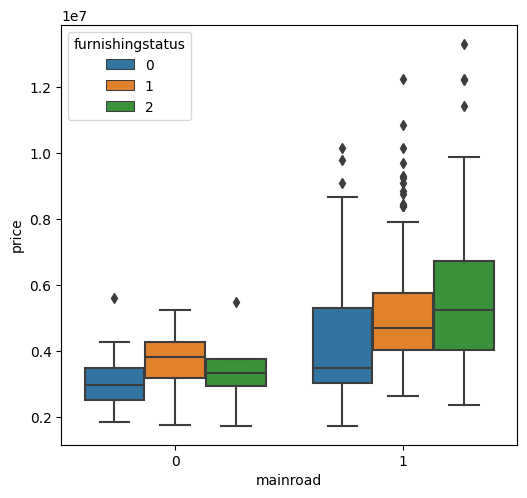

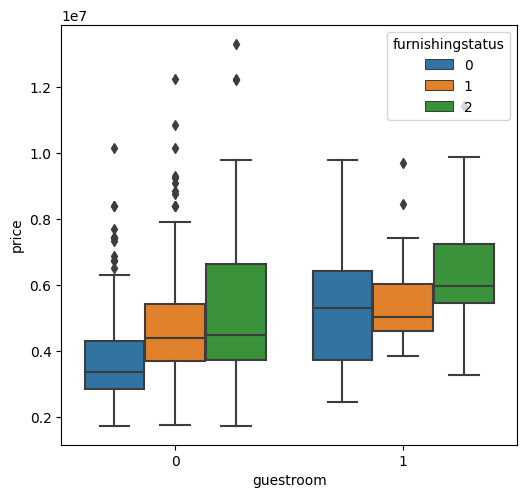

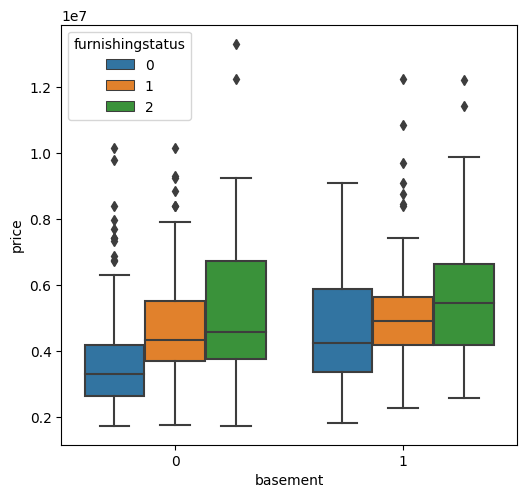

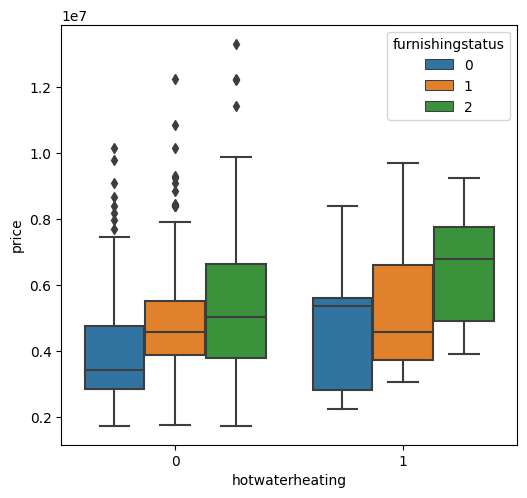

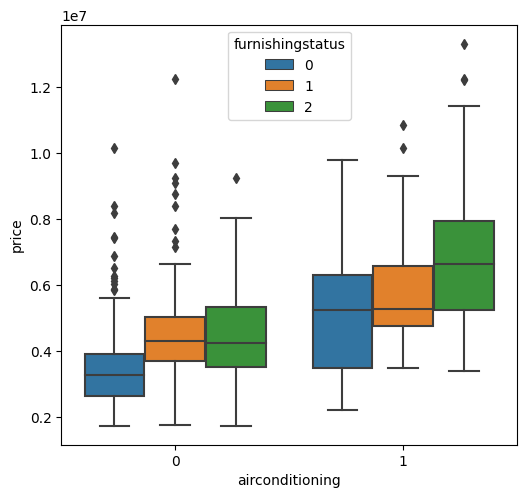

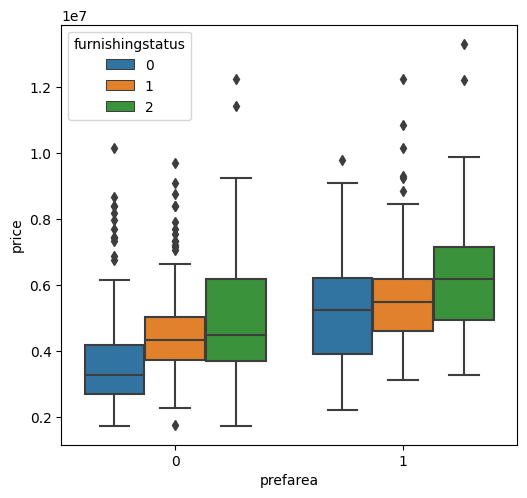

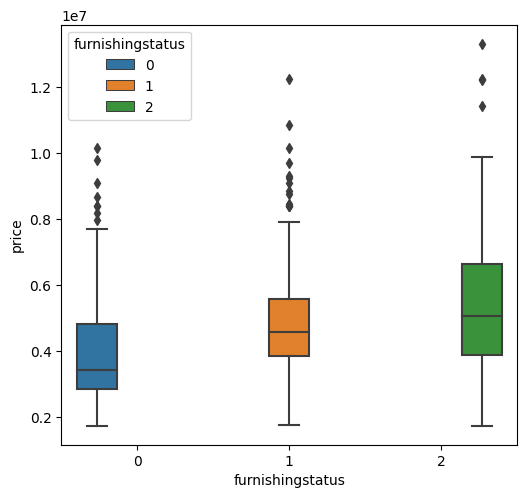

In [84]:
for column in df.columns:
    unique_values_2 = df[column].unique()
    if 0< unique_values_2.size <= 3:
        plt.figure(figsize=(20, 12))
        plt.subplot(2,3,1)
        sns.boxplot(x = column, y = 'price', hue = 'furnishingstatus', data = df)
        plt.show()


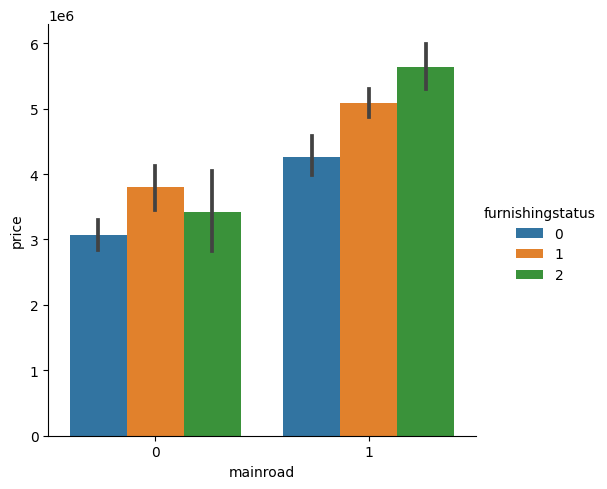

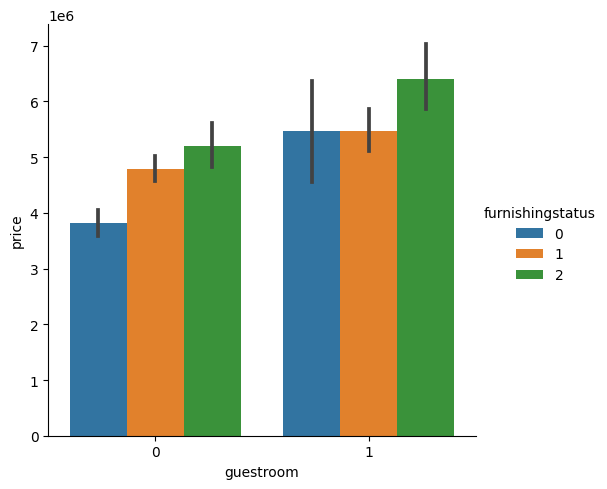

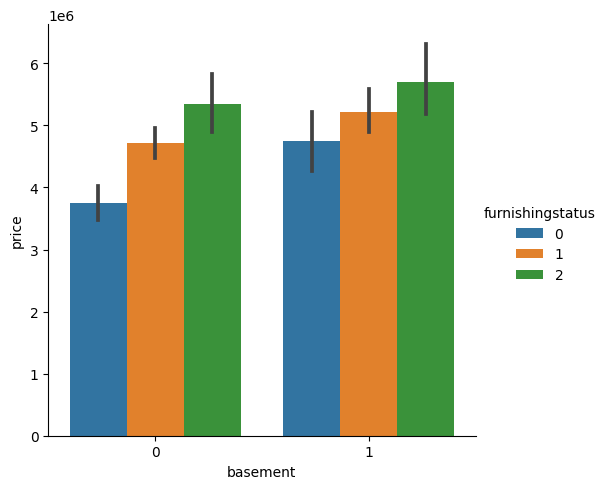

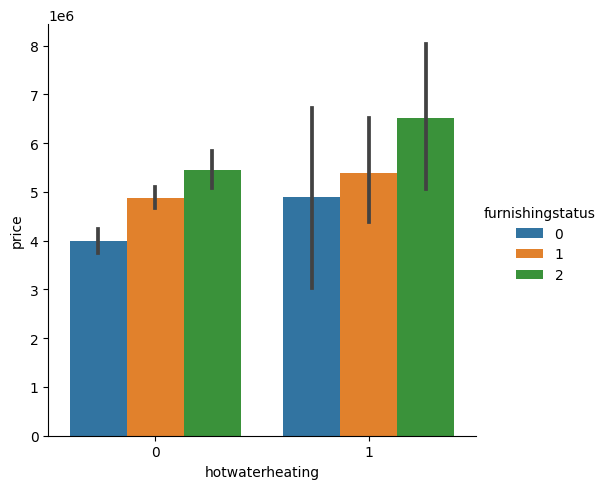

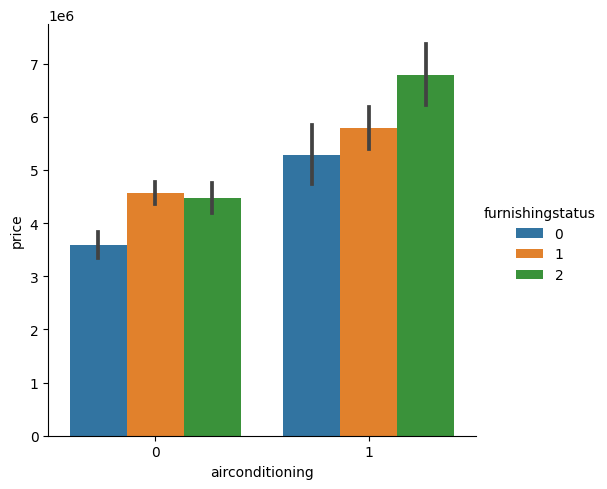

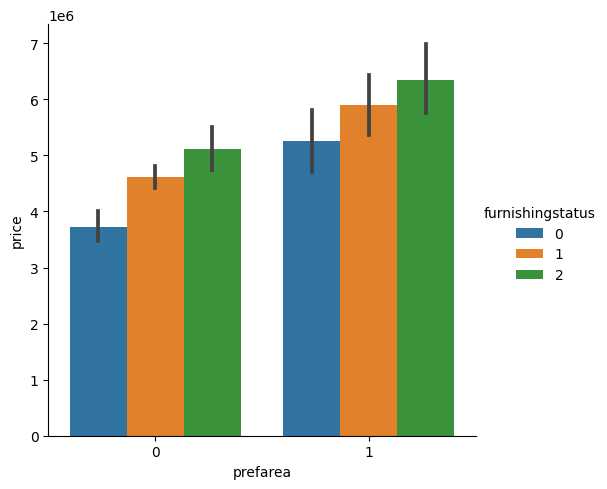

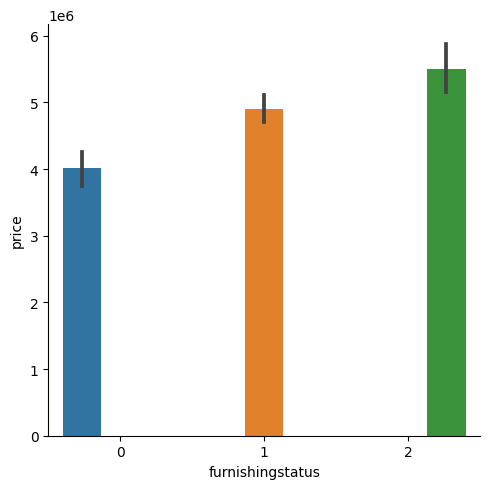

In [85]:
for column in df.columns:
    unique_values_2 = df[column].unique()
    if 0< unique_values_2.size <= 3:
        sns.catplot(x = column, y = 'price', hue = 'furnishingstatus', data = df, kind='bar')
        plt.show()


In [87]:
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
Y = df[['price']]
X

,area,bedrooms,bathrooms,stories,parking
0,7420,4,2,3,2
1,8960,4,4,4,3
2,9960,3,2,2,2
3,7500,4,2,2,3
4,7420,4,1,2,2
...,...,...,...,...,...
540,3000,2,1,1,2
541,2400,3,1,1,0
542,3620,2,1,1,0
543,2910,3,1,1,0


In [88]:
Y

,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000
...,...
540,1820000
541,1767150
542,1750000
543,1750000


In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train

,area,bedrooms,bathrooms,stories,parking
46,6000,3,2,4,1
93,7200,3,2,1,3
335,3816,2,1,1,2
412,2610,3,1,2,0
471,3750,3,1,2,0
...,...,...,...,...,...
71,6000,4,2,4,0
106,5450,4,2,1,0
270,4500,3,2,3,1
435,4040,2,1,1,0


In [90]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

X_train

array([[ 0.38416819,  0.05527092,  1.53917323,  2.58764353,  0.36795665],
       [ 0.9291807 ,  0.05527092,  1.53917323, -0.91249891,  2.70998729],
       [-0.60775457, -1.28351359, -0.5579503 , -0.91249891,  1.53897197],
       ...,
       [-0.29709744,  0.05527092,  1.53917323,  1.42092939,  0.36795665],
       [-0.5060189 , -1.28351359, -0.5579503 , -0.91249891, -0.80305867],
       [ 0.15707965,  0.05527092,  1.53917323,  2.58764353,  0.36795665]])

In [91]:
X_test

array([[ 0.33875048,  1.39405543,  1.53917323,  0.25421524,  0.36795665],
       [ 0.61125674,  0.05527092,  1.53917323,  1.42092939, -0.80305867],
       [-0.5060189 , -1.28351359, -0.5579503 , -0.91249891, -0.80305867],
       [-0.0700089 ,  0.05527092, -0.5579503 ,  0.25421524, -0.80305867],
       [-0.54235307,  0.05527092, -0.5579503 , -0.91249891, -0.80305867],
       [ 0.7111757 ,  0.05527092, -0.5579503 , -0.91249891, -0.80305867],
       [ 1.52869446,  0.05527092, -0.5579503 , -0.91249891,  1.53897197],
       [-0.07455067,  1.39405543,  1.53917323,  0.25421524, -0.80305867],
       [-0.86936058, -1.28351359, -0.5579503 , -0.91249891,  0.36795665],
       [-1.11461621,  0.05527092, -0.5579503 , -0.91249891, -0.80305867],
       [ 1.55594508,  1.39405543,  3.63629675,  2.58764353,  1.53897197],
       [-0.55416168, -1.28351359, -0.5579503 , -0.91249891, -0.80305867],
       [-0.65135557, -1.28351359, -0.5579503 , -0.91249891, -0.80305867],
       [-0.93294537,  0.05527092, -0.5

In [92]:
y_train

array([[ 1.60509012],
       [ 0.90746568],
       [-0.44791897],
       [-0.72696874],
       [-0.96615427],
       [-0.04927642],
       [-1.68371084],
       [-0.96615427],
       [-1.24520405],
       [-0.56751173],
       [-0.57149815],
       [-1.2850683 ],
       [-0.28846195],
       [-0.60737598],
       [-0.60737598],
       [ 0.38524395],
       [-1.6739441 ],
       [ 0.30950186],
       [-0.68710449],
       [ 1.18651545],
       [-0.44791897],
       [-0.44791897],
       [ 0.6284159 ],
       [ 0.30950186],
       [ 0.7081444 ],
       [-0.68710449],
       [-1.30898685],
       [-1.16547554],
       [ 0.32943399],
       [-0.58744385],
       [-0.28846195],
       [-1.38472894],
       [-0.64724024],
       [-0.04927642],
       [-0.28846195],
       [-0.92230359],
       [-0.82662938],
       [ 2.36251095],
       [-0.60737598],
       [ 1.50144306],
       [-0.00941217],
       [-0.22866557],
       [-0.60737598],
       [-0.17285561],
       [-0.24859769],
       [-1

In [93]:
y_test

array([[-0.36819046],
       [ 1.10678695],
       [-0.56751173],
       [ 0.98719418],
       [-1.08574703],
       [ 0.11018059],
       [ 0.30950186],
       [-0.0931271 ],
       [-1.2850683 ],
       [-0.77081942],
       [ 3.09999965],
       [-1.16547554],
       [-0.766833  ],
       [-0.766833  ],
       [-1.38472894],
       [-1.16547554],
       [-1.16547554],
       [ 1.50542949],
       [-1.00601852],
       [-1.04588278],
       [ 1.1466512 ],
       [ 0.4091625 ],
       [-1.60398234],
       [ 0.30950186],
       [-0.29244837],
       [ 4.29592728],
       [-0.92629001],
       [ 0.22977335],
       [ 2.90067838],
       [-1.24520405],
       [ 1.18651545],
       [-0.68710449],
       [ 1.10678695],
       [-1.00601852],
       [-0.78676513],
       [-0.28846195],
       [ 0.11018059],
       [-0.80669725],
       [-0.68710449],
       [-1.32493256],
       [ 0.44902675],
       [-0.58744385],
       [ 1.10678695],
       [ 0.11416702],
       [-0.88642576],
       [-0

In [94]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [95]:
rfe = RFE(lm)             # running RFE
rfe = rfe.fit(X_train, y_train)
rfe

RFE(estimator=LinearRegression())

In [96]:
predictions= lm.predict(X_test)
predictions

array([[ 0.83834533],
       [ 0.94741015],
       [-0.8105993 ],
       [-0.2736507 ],
       [-0.73853761],
       [-0.25306343],
       [ 0.44813865],
       [ 0.48598533],
       [-0.75902221],
       [-0.96016712],
       [ 2.74121283],
       [-0.82924433],
       [-0.86688616],
       [-0.60785394],
       [-0.45482403],
       [ 0.83589433],
       [-0.88747343],
       [ 0.09453999],
       [ 0.06815552],
       [-0.46584228],
       [ 0.29377645],
       [-0.2345943 ],
       [-0.87937481],
       [-0.29243218],
       [ 0.59294086],
       [ 1.65864571],
       [-0.97770092],
       [ 0.049818  ],
       [ 1.5532886 ],
       [-0.71157699],
       [ 0.22571444],
       [-0.41204176],
       [ 0.85946193],
       [ 0.01042205],
       [-0.22709399],
       [ 0.52354655],
       [ 0.04867045],
       [-0.50764881],
       [-0.8229679 ],
       [ 0.09848547],
       [ 0.35315457],
       [-0.88271684],
       [ 0.93333843],
       [-0.22207361],
       [-0.33391995],
       [-0

In [97]:
r2_score(y_test, predictions)

0.5464062355495862

Text(0, 0.5, 'Predictions')

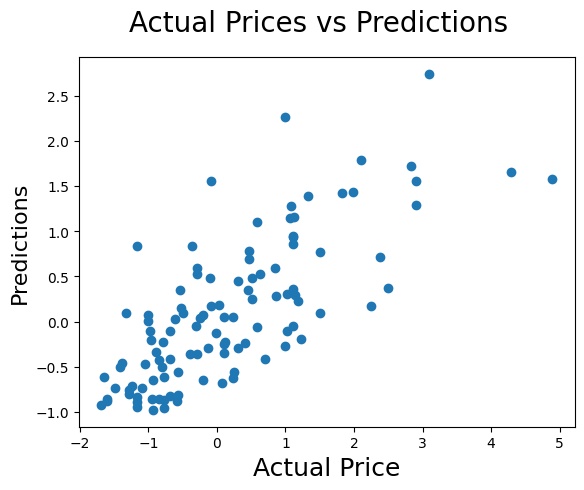

In [100]:
# Plotting y_test and predictions to understand the spread.
fig = plt.figure()
plt.scatter(y_test,predictions)
fig.suptitle('Actual Prices vs Predictions', fontsize=20)              # Plot heading
plt.xlabel('Actual Price', fontsize=18)                          # X-label
plt.ylabel('Predictions', fontsize=16)